# kaggle rmse score: 0.12964

In [463]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt       
%matplotlib inline 
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [464]:
train=pd.read_csv('train.csv')
train.shape

(1460, 81)

In [465]:
test=pd.read_csv('test.csv')
test.shape

(1459, 80)

In [466]:
train[train.duplicated()]
#no duplicate rows in training set

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

## Before processing we will merge the train and test data so as to clean data conveniently, however we will make imputations in the test set solely based on training set

In [467]:
merge1 = train.drop("SalePrice",axis=1)
merge1

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...           0        0    NaN    NaN   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN    NaN   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            Lvl    AllPub  ...           0        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1457         Lvl    AllPub  ...           0        0    NaN  GdPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   
1459         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      2    2008        WD         Normal  
1            NaN       0      5    2007        WD         Normal  
2            NaN       0      9    2008        WD         Normal  
3            NaN       0      2    2006        WD        Abnorml  
4            NaN       0     12    2008        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1455         NaN       0      8    2007        WD         Normal  
1456         NaN       0      2    2010        WD         Normal  
1457        Shed    2500      5    2010        WD         Normal  
1458         NaN       0      4    2010        WD         Normal  
1459         NaN       0      6    2008        WD         Normal  

[1460 rows x 80 columns]

In [468]:
test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [469]:
merged = merge1.append(test)
merged

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...           0        0    NaN    NaN   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN    NaN   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            Lvl    AllPub  ...           0        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      2    2008        WD         Normal  
1            NaN       0      5    2007        WD         Normal  
2            NaN       0      9    2008        WD         Normal  
3            NaN       0      2    2006        WD        Abnorml  
4            NaN       0     12    2008        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[2919 rows x 80 columns]

In [470]:
train.describe().transpose()

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [471]:
merged.info()
# alley: (NA means no alley access)
# YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
# FireplaceQu: Fireplace quality (NA means no fireplace)
# garagetype: NA means no garage
# many other columns have NA values but they do not mean null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

# Missing Values

In [472]:
count=0
for cols in merged.columns:
    if(merged[cols].isnull().sum()>0):
        print(cols+" : "+str(merged[cols].isnull().sum()))
        count=count+1
        
print("we have "+str(count)+" columns that have missing data")

MSZoning : 4
LotFrontage : 486
Alley : 2721
Utilities : 2
Exterior1st : 1
Exterior2nd : 1
MasVnrType : 24
MasVnrArea : 23
BsmtQual : 81
BsmtCond : 82
BsmtExposure : 82
BsmtFinType1 : 79
BsmtFinSF1 : 1
BsmtFinType2 : 80
BsmtFinSF2 : 1
BsmtUnfSF : 1
TotalBsmtSF : 1
Electrical : 1
BsmtFullBath : 2
BsmtHalfBath : 2
KitchenQual : 1
Functional : 2
FireplaceQu : 1420
GarageType : 157
GarageYrBlt : 159
GarageFinish : 159
GarageCars : 1
GarageArea : 1
GarageQual : 159
GarageCond : 159
PoolQC : 2909
Fence : 2348
MiscFeature : 2814
SaleType : 1
we have 34 columns that have missing data


# processing MSZoning and MSSubClass
we have 4 missing values in this column which we will replace with the label with highest frequency in the training set. 

In [473]:
# merged[0:1460]
# merged[1460:]

In [474]:
merged[0:1460]['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [475]:
merged['MSZoning'].fillna(value="RL",inplace=True)

In [476]:
merged['MSZoning'].isnull().sum()

0

**Encoding columns**

In [477]:
merged[["MSZoning","MSSubClass"]].dtypes

MSZoning      object
MSSubClass     int64
dtype: object

In [478]:
merged["MSZoning"] = merged["MSZoning"].astype('category')
merged["MSSubClass"] = merged["MSSubClass"].astype('category')

In [479]:
merged[["MSZoning","MSSubClass"]].dtypes

MSZoning      category
MSSubClass    category
dtype: object

In [480]:
merged=pd.get_dummies(merged, columns=["MSSubClass", "MSZoning"], drop_first=True)

# processing LotFrontage
somewhat normal distribution. Also we can see how median and mean are almost same so we can impute the missing data with either of the two

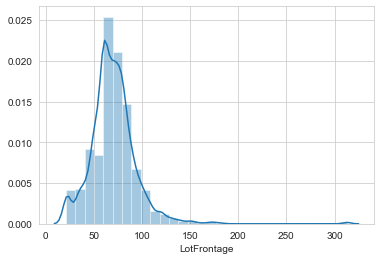

In [481]:
sns.distplot(merged[0:1460]["LotFrontage"],bins=30)

In [482]:
merged[0:1460]["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [483]:
merged['LotFrontage'].fillna(value=merged[0:1460]["LotFrontage"].median(),inplace=True)

In [484]:
merged['LotFrontage'].isnull().sum()

0

# processing Street, Alley, LotShape, LandContour
The nan values in alley represent that the property has no ally access. Hence we will replace all nan values with "no alley"

In [485]:
merged[0:1460]["Alley"].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [486]:
merged['Alley'].fillna(value="no alley",inplace=True)
merged['Alley'].isnull().sum()

0

In [487]:
merged["Alley"].value_counts()

no alley    2721
Grvl         120
Pave          78
Name: Alley, dtype: int64

**Encoding columns**

In [488]:
merged[["Street", "Alley", "LotShape", "LandContour"]].dtypes

Street         object
Alley          object
LotShape       object
LandContour    object
dtype: object

In [489]:
for col in ["Street", "Alley", "LotShape", "LandContour"] :
    merged[col] = merged[col].astype('category')

In [490]:
merged=pd.get_dummies(merged, columns=["Street", "Alley", "LandContour","LotShape"], drop_first=True)

# processing Utilities
2 nan values in utilities will be replaced by label with highest frequency

In [491]:
merged[0:1460]['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [492]:
merged['Utilities'].fillna(value="AllPub",inplace=True)
merged['Utilities'].isnull().sum()

0

**Encoding columns**

In [493]:
merged[["Utilities"]].dtypes

Utilities    object
dtype: object

In [494]:
merged["Utilities"] = merged["Utilities"].astype('category')

In [495]:
merged=merged.replace({"Utilities":{"AllPub":3, "NoSewr":2, "NoSeWa":1 ,"ELO":0}})

# processing LotConfig, LandSlope,Neighborhood

In [496]:
merged[0:1460]["LotConfig"].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [497]:
merged[0:1460]["LandSlope"].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [498]:
merged[0:1460]["Neighborhood"].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

**Encoding columns**

In [499]:
merged["LotConfig"] = merged["LotConfig"].astype('category')
merged["LandSlope"] = merged["LandSlope"].astype('category')
merged["Neighborhood"] = merged["Neighborhood"].astype('category')

In [500]:
merged=pd.get_dummies(merged, columns=["LotConfig","LandSlope","Neighborhood"], drop_first=True)

# processing BldgType and HouseStyle

In [501]:
merged[0:1460]["BldgType"].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [502]:
merged[0:1460]["HouseStyle"].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

**Encoding columns**

In [503]:
merged["BldgType"] = merged["BldgType"].astype('category')
merged["HouseStyle"] = merged["HouseStyle"].astype('category')

In [504]:
merged=pd.get_dummies(merged, columns=["BldgType","HouseStyle"], drop_first=True)

# processing YearBuilt and YearRemodAdd
we will calculate "age" of the house from this year(2020). If the house is remodeled we will calculate "age" from the remodelled year.<br> Acc to the description of the dataset if yearbuilt and yearremoddelled is same then the house is not remodelled.<br>We will also make a yes/no col that will say if the house has been remodelled or not

In [505]:
merged["age"] = merged.apply(lambda row: 2020-row["YearBuilt"] if row["YearBuilt"]==row["YearRemodAdd"] else 2020-row["YearRemodAdd"],axis=1)
merged["is_remodelled"] = merged.apply(lambda row: 0 if row["YearBuilt"]==row["YearRemodAdd"] else 1,axis=1)

In [506]:
merged[["YearBuilt","YearRemodAdd","age","is_remodelled"]]

YearBuilt  YearRemodAdd  age  is_remodelled
0          2003          2003   17              0
1          1976          1976   44              0
2          2001          2002   18              1
3          1915          1970   50              1
4          2000          2000   20              0
...         ...           ...  ...            ...
1454       1970          1970   50              0
1455       1970          1970   50              0
1456       1960          1996   24              1
1457       1992          1992   28              0
1458       1993          1994   26              1

[2919 rows x 4 columns]

we can now drop yearbuilt and year remodelled columns

In [507]:
merged.drop(["YearBuilt","YearRemodAdd"],axis=1,inplace=True)

**Encoding columns**

In [508]:
merged["is_remodelled"] = merged["is_remodelled"].astype("category")
merged=pd.get_dummies(merged, columns=["is_remodelled"])

# processing RoofStyle and RoofMatl

In [509]:
merged[0:1460]["RoofStyle"].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [510]:
merged[0:1460]["RoofMatl"].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
ClyTile       1
Roll          1
Metal         1
Name: RoofMatl, dtype: int64

**Encoding columns**

In [511]:
merged["RoofMatl"] = merged["RoofMatl"].astype('category')
merged["RoofStyle"] = merged["RoofStyle"].astype('category')

In [512]:
merged=pd.get_dummies(merged, columns=["RoofStyle","RoofMatl"], drop_first=True)

# processing exterior1st, exterior2nd, ExterQual, ExterCond

In [513]:
print(merged[0:1460]["Exterior1st"].value_counts())
print("")
print(merged[0:1460]["Exterior2nd"].value_counts())

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64


In [514]:
merged['Exterior1st'].fillna(value="VinylSd",inplace=True)
merged['Exterior2nd'].fillna(value="VinylSd",inplace=True)
print(merged['Exterior1st'].isnull().sum())
print(merged['Exterior2nd'].isnull().sum())

0
0


We can see that we have same labels but they are spelled differently in both columns, hence we will correct the spelling of the labels in both the columns. Below are the orignol labels as provided by kaggle:<br>

AsbShng: Asbestos Shingles<br>
AsphShn: Asphalt Shingles<br>
BrkComm: Brick Common<br>
BrkFace: Brick Face<br>
CBlock: Cinder Block<br>
CemntBd: Cement Board<br>
HdBoard: Hard Board<br>
ImStucc: Imitation Stucco<br>
MetalSd: Metal Siding<br>
Other: Other<br>
Plywood: Plywood<br>
PreCast: PreCast	<br>
Stone: Stone<br>
Stucco: Stucco<br>
VinylSd: Vinyl Siding<br>
Wd Sdng: Wood Siding<br>
WdShing: Wood Shingles

In [515]:
print(list(merged["Exterior1st"].value_counts().to_dict()))
print("")
print(list(merged["Exterior2nd"].value_counts().to_dict()))

['VinylSd', 'MetalSd', 'HdBoard', 'Wd Sdng', 'Plywood', 'CemntBd', 'BrkFace', 'WdShing', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn', 'Stone', 'CBlock', 'ImStucc']

['VinylSd', 'MetalSd', 'HdBoard', 'Wd Sdng', 'Plywood', 'CmentBd', 'Wd Shng', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc', 'Stone', 'AsphShn', 'CBlock', 'Other']


all labels in exterior1st are in complaince with the labels abbreviations provided by kaggle<br>
Cement Board in exterior2nd is abbreviated as CmentBd instead of CemntBd<br>
Wood Shingles in exterior2nd is abbreviated as Wd Shng instead of WdShing<br>
Brick Common in exterior2nd is abbreviated as Brk Cmn instead of BrkComm

In [516]:
correct_abbr = {"CmentBd":"CemntBd","Wd Shng":"WdShing","Brk Cmn":"BrkComm"}
merged["Exterior2nd"] = merged["Exterior2nd"].replace(correct_abbr)
merged["Exterior2nd"].value_counts()

VinylSd    1015
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CemntBd     126
WdShing      81
BrkFace      47
Stucco       47
AsbShng      38
BrkComm      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [517]:
merged["Exterior1st"] = merged["Exterior1st"].astype('category')
merged["Exterior2nd"] = merged["Exterior2nd"].astype('category')
merged["ExterQual"] = merged["ExterQual"].astype('category')
merged["ExterCond"] = merged["ExterCond"].astype('category')

merged=merged.replace({"ExterQual":{"Po":0, "Fa":1, "TA":2 ,"Gd":3,"Ex":4},
                       "ExterCond":{"Po":0, "Fa":1, "TA":2 ,"Gd":3,"Ex":4}
                      })

merged=pd.get_dummies(merged, columns=["Exterior1st","Exterior2nd"], drop_first=True)

# processing MasVnrType and MasVnrArea

In [518]:
print(merged['MasVnrType'].isnull().sum())
print(merged['MasVnrArea'].isnull().sum())

24
23


In [519]:
merged[0:1460]["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [520]:
merged['MasVnrType'].fillna(value="None",inplace=True)
merged['MasVnrArea'].fillna(value=0.0,inplace=True)
print(merged['MasVnrType'].isnull().sum())
print(merged['MasVnrArea'].isnull().sum())

0
0


Below are the houses that have a masonory vaneer but there area is 0. We will replace them with the median area values for their corresponding veneer type.

In [521]:
merged[(merged["MasVnrType"]!="None")&(merged["MasVnrArea"]<=0)][["Id","MasVnrType","MasVnrArea"]]

Id MasVnrType  MasVnrArea
688    689    BrkFace         0.0
1241  1242      Stone         0.0
859   2320    BrkFace         0.0

In [522]:
merged[0:1460].groupby(by="MasVnrType").median().reset_index()[["MasVnrType","MasVnrArea"]]

MasVnrType  MasVnrArea
0     BrkCmn       192.0
1    BrkFace       202.0
2       None         0.0
3      Stone       206.5

In [523]:
merged['MasVnrArea'][(merged['Id']==689)|(merged['Id']==2320)]=202
merged['MasVnrArea'][(merged['Id']==1242)]=206.5
merged[(merged['Id']==689)|(merged['Id']==2320)|(merged['Id']==1242)][["Id","MasVnrType","MasVnrArea"]]

Id MasVnrType  MasVnrArea
688    689    BrkFace       202.0
1241  1242      Stone       206.5
859   2320    BrkFace       202.0

Below are the houses that do not have a masonory vaneer but there area is not 0. Here we see that house id 625,1301,1335,1670,2611 hv area but the MaVnrType is none. we will replace these 5 houses with second highest occurring label in MasVnrType **(BrkFace)** in training set (Since 1st in None).<br>
Also for houses that have area 1.0 and type None, we will change their area to 0.0.

In [524]:
merged[(merged["MasVnrType"]=="None")&(merged["MasVnrArea"]>0)][["Id","MasVnrType","MasVnrArea"]]

Id MasVnrType  MasVnrArea
624    625       None       288.0
773    774       None         1.0
1230  1231       None         1.0
1300  1301       None       344.0
1334  1335       None       312.0
209   1670       None       285.0
992   2453       None         1.0
1150  2611       None       198.0

In [525]:
merged['MasVnrArea'][(merged['Id']==774)|(merged['Id']==1231)|(merged['Id']==2453)]=0.0
merged['MasVnrType'][(merged['Id']==625)|(merged['Id']==1301)|(merged['Id']==1335)|(merged['Id']==1670)|(merged['Id']==2611)]="BrkFace"
merged[(merged["MasVnrType"]=="None")&(merged["MasVnrArea"]>0)][["Id","MasVnrType","MasVnrArea"]]

Empty DataFrame
Columns: [Id, MasVnrType, MasVnrArea]
Index: []

one-hot encode MasVnrType

In [526]:
merged["MasVnrType"] = merged["MasVnrType"].astype('category')
merged=pd.get_dummies(merged, columns=["MasVnrType"], drop_first=True)

# Foundation

In [527]:
merged[0:1460]["Foundation"].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [528]:
merged["Foundation"] = merged["Foundation"].astype('category')
merged=pd.get_dummies(merged, columns=["Foundation"], drop_first=True)

# processing BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and  BsmtHalfBath
These are the features related to the basement. Some of these features are categorical while some are numeric. The na values in the categorical features represent no basement, hence we will replace all nan values with "no basement"

There are two missing values in BsmtFullBath and BsmtHalfBath and we see that these two houses dont have a basement hence we will replace all the nan values in this house with "no basement" for the categorical features and 0.0 for the numerical ones

In [529]:
merged[merged["BsmtFullBath"].isnull()][["Id","BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"]]

Id BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
660  2121      NaN      NaN          NaN          NaN         NaN   
728  2189      NaN      NaN          NaN          NaN         0.0   

    BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  \
660          NaN         NaN        NaN          NaN           NaN   
728          NaN         0.0        0.0          0.0           NaN   

     BsmtHalfBath  
660           NaN  
728           NaN

Also there is one missing value in all the numerical columns related to basement

In [530]:
merged[merged["BsmtFinSF1"].isnull()][["Id","BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"]]

Id BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
660  2121      NaN      NaN          NaN          NaN         NaN   

    BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  \
660          NaN         NaN        NaN          NaN           NaN   

     BsmtHalfBath  
660           NaN

**house id 2121 is common in both. We shall replace all the nan values in these two rows so that they represent "no basement"** 

In [531]:
merged[0:1460]["BsmtQual"].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [532]:
merged[0:1460]["BsmtCond"].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [533]:
merged[0:1460]["BsmtExposure"].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [534]:
merged[0:1460]["BsmtFinType1"].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [535]:
merged[0:1460]["BsmtFinType2"].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [536]:
merged[0:1460]["BsmtFullBath"].value_counts()

0.0    856
1.0    588
2.0     15
3.0      1
Name: BsmtFullBath, dtype: int64

In [537]:
merged[0:1460]["BsmtHalfBath"].value_counts()

0.0    1378
1.0      80
2.0       2
Name: BsmtHalfBath, dtype: int64

In [538]:
categorical_replacement = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
numerical_replacement = ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"]

In [539]:
for cr in categorical_replacement:
    merged[cr][(merged['Id']==2121)|(merged['Id']==2189)]="no basement"
    

for nr in numerical_replacement:
    merged[nr][(merged['Id']==2121)|(merged['Id']==2189)]=0.0


merged[(merged['Id']==2121)|(merged['Id']==2189)][['Id'] + categorical_replacement + numerical_replacement]

Id     BsmtQual     BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
660  2121  no basement  no basement  no basement  no basement  no basement   
728  2189  no basement  no basement  no basement  no basement  no basement   

     BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  \
660         0.0         0.0        0.0          0.0           0.0   
728         0.0         0.0        0.0          0.0           0.0   

     BsmtHalfBath  
660           0.0  
728           0.0

In [540]:
merged[categorical_replacement + numerical_replacement].isnull().sum()

BsmtQual        79
BsmtCond        80
BsmtExposure    80
BsmtFinType1    77
BsmtFinType2    78
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
BsmtFullBath     0
BsmtHalfBath     0
dtype: int64

We can see from above that the not all nan values in basement features represent "no basement". Hence these are some anomolies in the data that we will correct.<br>
The following house ids have anomolies

In [541]:
merged[(merged["BsmtCond"].isnull())&(merged["BsmtQual"].isnull()==False)][["Id","BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"]]

Id BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
580   2041       Gd      NaN           Mn          GLQ      1044.0   
725   2186       TA      NaN           No          BLQ      1033.0   
1064  2525       TA      NaN           Av          ALQ       755.0   

     BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  \
580           Rec       382.0        0.0       1426.0           1.0   
725           Unf         0.0       94.0       1127.0           0.0   
1064          Unf         0.0      240.0        995.0           0.0   

      BsmtHalfBath  
580            0.0  
725            1.0  
1064           0.0

In [542]:
merged[(merged["BsmtCond"].isnull())&(merged["BsmtFinType1"].isnull()==False)][["Id","BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"]]

Id BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
580   2041       Gd      NaN           Mn          GLQ      1044.0   
725   2186       TA      NaN           No          BLQ      1033.0   
1064  2525       TA      NaN           Av          ALQ       755.0   

     BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  \
580           Rec       382.0        0.0       1426.0           1.0   
725           Unf         0.0       94.0       1127.0           0.0   
1064          Unf         0.0      240.0        995.0           0.0   

      BsmtHalfBath  
580            0.0  
725            1.0  
1064           0.0

In [543]:
merged[(merged["BsmtCond"].isnull())&(merged["BsmtFinType2"].isnull()==False)][["Id","BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"]]

Id BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
580   2041       Gd      NaN           Mn          GLQ      1044.0   
725   2186       TA      NaN           No          BLQ      1033.0   
1064  2525       TA      NaN           Av          ALQ       755.0   

     BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  \
580           Rec       382.0        0.0       1426.0           1.0   
725           Unf         0.0       94.0       1127.0           0.0   
1064          Unf         0.0      240.0        995.0           0.0   

      BsmtHalfBath  
580            0.0  
725            1.0  
1064           0.0

In [544]:
merged[(merged["BsmtCond"].isnull()==False)&(merged["BsmtExposure"].isnull())][["Id","BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"]]

Id BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
948   949       Gd       TA          NaN          Unf         0.0   
27   1488       Gd       TA          NaN          Unf         0.0   
888  2349       Gd       TA          NaN          Unf         0.0   

    BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  \
948          Unf         0.0      936.0        936.0           0.0   
27           Unf         0.0     1595.0       1595.0           0.0   
888          Unf         0.0      725.0        725.0           0.0   

     BsmtHalfBath  
948           0.0  
27            0.0  
888           0.0

Nan values in the house Ids 2041,2186,2525,949,1488,2349 must be fixed. We will replace the nan columns in these houses with the highest occurring label from training set

In [545]:
merged["BsmtCond"][(merged['Id']==2041)|(merged['Id']==2186)|(merged['Id']==2525)]="TA"
merged["BsmtExposure"][(merged['Id']==949)|(merged['Id']==1488)|(merged['Id']==2349)]="No"

In [546]:
merged[categorical_replacement + numerical_replacement].isnull().sum()

BsmtQual        79
BsmtCond        77
BsmtExposure    77
BsmtFinType1    77
BsmtFinType2    78
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
BsmtFullBath     0
BsmtHalfBath     0
dtype: int64

we can see a few more anomolies

In [547]:
merged[(merged["BsmtCond"].isnull()==False)&(merged["BsmtQual"].isnull())][["Id","BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"]]

Id BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
757  2218      NaN       Fa           No          Unf         0.0   
758  2219      NaN       TA           No          Unf         0.0   

    BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  \
757          Unf         0.0      173.0        173.0           0.0   
758          Unf         0.0      356.0        356.0           0.0   

     BsmtHalfBath  
757           0.0  
758           0.0

In [548]:
merged[(merged["BsmtCond"].isnull()==False)&(merged["BsmtFinType2"].isnull())][["Id","BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"]]

Id BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
332  333       Gd       TA           No          GLQ      1124.0          NaN   

     BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath  
332       479.0     1603.0       3206.0           1.0           0.0

In [549]:
merged["BsmtQual"][(merged['Id']==2218)|(merged['Id']==2219)|(merged['Id']==2525)]="TA"
merged["BsmtFinType2"][merged['Id']==333]="Unf"

In [550]:
merged[categorical_replacement + numerical_replacement].isnull().sum()

BsmtQual        77
BsmtCond        77
BsmtExposure    77
BsmtFinType1    77
BsmtFinType2    77
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
BsmtFullBath     0
BsmtHalfBath     0
dtype: int64

In [551]:
for cr in categorical_replacement:
    merged[cr].fillna(value="no basement",inplace=True)
    print(merged[cr].isnull().sum())

0
0
0
0
0


In [552]:
merged[categorical_replacement + numerical_replacement].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

encoding categorical columns 

In [553]:
for cr in categorical_replacement:
    merged[cr] = merged[cr].astype('category')

In [554]:
d={
    "BsmtQual":{"no basement":-1, "Po":0, "Fa":1, "TA":2, "Gd":3, "Ex":4},
    "BsmtCond":{"no basement":-1, "Po":0, "Fa":1, "TA":2, "Gd":3, "Ex":4},
    "BsmtExposure":{"no basement":-1, "No":0, "Mn":1, "Av":2, "Gd":3},
    "BsmtFinType1":{"no basement":-1, "Unf":0, "LwQ":1, "Rec":2, "BLQ":3, "ALQ":4, "GLQ":5},
    "BsmtFinType2":{"no basement":-1, "Unf":0, "LwQ":1, "Rec":2, "BLQ":3, "ALQ":4, "GLQ":5}
}

merged=merged.replace(d)

# processing Electrical

In [555]:
merged[0:1460]["Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [556]:
merged["Electrical"].fillna(value="SBrkr",inplace=True)
print(merged["Electrical"].isnull().sum())

0


In [557]:
merged["Electrical"] = merged["Electrical"].astype('category')
merged=pd.get_dummies(merged, columns=["Electrical"], drop_first=True)

# processing Heating, HeatingQC and CentralAir

In [558]:
merged["Heating"] = merged["Heating"].astype('category')
merged["HeatingQC"] = merged["HeatingQC"].astype('category')
merged["CentralAir"] = merged["CentralAir"].astype('category')

merged=pd.get_dummies(merged, columns=["Heating"], drop_first=True)
merged=pd.get_dummies(merged, columns=["CentralAir"])
merged=merged.replace({"HeatingQC":{"Po":0, "Fa":1, "TA":2, "Gd":3, "Ex":4}})

# processing KitchenQual, Functional

In [559]:
print(merged[0:1460]["KitchenQual"].value_counts())
print("")
print(merged[0:1460]["Functional"].value_counts())

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64


In [560]:
merged["KitchenQual"].fillna(value="TA",inplace=True)
merged["Functional"].fillna(value="Typ",inplace=True)

In [561]:
merged["KitchenQual"] = merged["KitchenQual"].astype('category')
merged["Functional"] = merged["Functional"].astype('category')

In [562]:
merged=pd.get_dummies(merged, columns=["Functional"], drop_first=True)
merged=merged.replace({"KitchenQual":{"Po":0, "Fa":1, "TA":2, "Gd":3, "Ex":4}})

# processing FireplaceQu
na values in fireplace means no fireplace

In [563]:
print(merged[0:1460]["FireplaceQu"].value_counts())

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


In [564]:
merged["FireplaceQu"].fillna(value="no fireplace",inplace=True)

In [565]:
merged[(merged["Fireplaces"]<=0)&(merged["FireplaceQu"]!="no fireplace")][["Fireplaces","FireplaceQu"]]

Empty DataFrame
Columns: [Fireplaces, FireplaceQu]
Index: []

In [566]:
merged[(merged["Fireplaces"]>0)&(merged["FireplaceQu"]=="no fireplace")][["Fireplaces","FireplaceQu"]]

Empty DataFrame
Columns: [Fireplaces, FireplaceQu]
Index: []

In [567]:
merged["FireplaceQu"] = merged["FireplaceQu"].astype('category')
merged=merged.replace({"FireplaceQu":{"no fireplace":-1, "Po":0, "Fa":1, "TA":2, "Gd":3, "Ex":4}})

# processing GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond

All the na values in garage columns represents that there is no garage however there are these two records/houses where we have a garage and its type but we dont have its year, finish, quality and condition.<br>Therefore for these two houses we will replace their attributes of the garage based on the often attributes of that particular garage type in the training set.

In [568]:
l = ["GarageType", "GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond"]
for ll in l:
    print(ll+": "+str(merged[ll].isnull().sum()))

GarageType: 157
GarageYrBlt: 159
GarageFinish: 159
GarageCars: 1
GarageArea: 1
GarageQual: 159
GarageCond: 159


In [569]:
dff = merged[["Id","GarageType","GarageYrBlt","GarageFinish","GarageCars", "GarageArea","GarageQual","GarageCond"]]
dff[(dff["GarageFinish"].isnull())&(dff["GarageType"].isnull()==False)]

Id GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
666   2127     Detchd          NaN          NaN         1.0       360.0   
1116  2577     Detchd          NaN          NaN         NaN         NaN   

     GarageQual GarageCond  
666         NaN        NaN  
1116        NaN        NaN

In [570]:
merged[0:1460].groupby(by=["GarageType"]).median().reset_index()[["GarageType","GarageYrBlt", "GarageArea"]]

GarageType  GarageYrBlt  GarageArea
0     2Types       1969.0       825.0
1     Attchd       1990.0       500.0
2    Basment       1958.0       450.0
3    BuiltIn       2003.0       553.0
4    CarPort       1963.0       462.0
5     Detchd       1965.0       400.0

In [571]:
merged[0:1460][merged[0:1460]["GarageType"]=="Detchd"]["GarageFinish"].value_counts()

Unf    354
RFn     19
Fin     14
Name: GarageFinish, dtype: int64

In [572]:
merged[0:1460][merged[0:1460]["GarageType"]=="Detchd"]["GarageQual"].value_counts()

TA    340
Fa     37
Gd      4
Po      3
Ex      3
Name: GarageQual, dtype: int64

In [573]:
merged[0:1460][merged[0:1460]["GarageType"]=="Detchd"]["GarageCond"].value_counts()

TA    345
Fa     31
Po      7
Ex      2
Gd      2
Name: GarageCond, dtype: int64

In [574]:
merged[0:1460][merged[0:1460]["GarageType"]=="Detchd"]["GarageCars"].value_counts()

2.0    196
1.0    179
3.0      9
4.0      3
Name: GarageCars, dtype: int64

In [575]:
merged['GarageYrBlt'][(merged['Id']==2127)|(merged['Id']==2577)]=1965
merged['GarageFinish'][(merged['Id']==2127)|(merged['Id']==2577)]="Unf"
merged['GarageQual'][(merged['Id']==2127)|(merged['Id']==2577)]="TA"
merged['GarageCond'][(merged['Id']==2127)|(merged['Id']==2577)]="TA"

merged['GarageCars'][merged['Id']==2577]=2
merged['GarageArea'][merged['Id']==2577]=400

In [576]:
merged[(merged['Id']==2127)|(merged['Id']==2577)][["Id","GarageType","GarageYrBlt","GarageFinish","GarageCars", "GarageArea","GarageQual","GarageCond"]]

Id GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
666   2127     Detchd       1965.0          Unf         1.0       360.0   
1116  2577     Detchd       1965.0          Unf         2.0       400.0   

     GarageQual GarageCond  
666          TA         TA  
1116         TA         TA

In [577]:
l = ["GarageType", "GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond"]
for ll in l:
    print(ll+": "+str(merged[ll].isnull().sum()))

GarageType: 157
GarageYrBlt: 157
GarageFinish: 157
GarageCars: 0
GarageArea: 0
GarageQual: 157
GarageCond: 157


replacing all the na values other than the above two with "no garage" in the categorical garage columns and replacing year with 0 since there is no garage

In [578]:
merged["GarageType"].fillna(value="no garage",inplace=True)
merged["GarageFinish"].fillna(value="no garage",inplace=True)
merged["GarageQual"].fillna(value="no garage",inplace=True)
merged["GarageCond"].fillna(value="no garage",inplace=True)
merged["GarageYrBlt"].fillna(value=0,inplace=True)

In [579]:
merged[["GarageType","GarageYrBlt","GarageFinish","GarageCars", "GarageArea","GarageQual","GarageCond"]].isnull().sum()

GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
GarageQual      0
GarageCond      0
dtype: int64

calculating garage age from garage year and dropping garageyrblt column. 0.0 in GarageAge represents no garage.

In [580]:
merged["GarageYrBlt"].value_counts()

0.0       157
2005.0    142
2006.0    115
2007.0    115
2004.0     99
         ... 
1933.0      1
1919.0      1
1896.0      1
2207.0      1
1906.0      1
Name: GarageYrBlt, Length: 104, dtype: int64

In [581]:
merged["GarageAge"] = merged.apply(lambda row: 2020-row["GarageYrBlt"] if row["GarageYrBlt"]!=0.0 else row["GarageYrBlt"],axis=1)
merged[["GarageAge","GarageYrBlt"]]

GarageAge  GarageYrBlt
0          17.0       2003.0
1          44.0       1976.0
2          19.0       2001.0
3          22.0       1998.0
4          20.0       2000.0
...         ...          ...
1454        0.0          0.0
1455       50.0       1970.0
1456       60.0       1960.0
1457        0.0          0.0
1458       27.0       1993.0

[2919 rows x 2 columns]

In [582]:
merged.drop(["GarageYrBlt"],axis=1,inplace=True)

In [583]:
merged["GarageType"] = merged["GarageType"].astype('category')
merged["GarageFinish"] = merged["GarageFinish"].astype('category')
merged["GarageQual"] = merged["GarageQual"].astype('category')
merged["GarageCond"] = merged["GarageCond"].astype('category')

merged=pd.get_dummies(merged, columns=["GarageType"], drop_first=True)
merged=merged.replace({"GarageFinish":{"no garage":-1, "Unf":0, "RFn":1, "Fin":2},
                      "GarageQual":{"no garage":-1, "Po":0, "Fa":1, "TA":2, "Gd":3, "Ex":4},
                      "GarageCond":{"no garage":-1, "Po":0, "Fa":1, "TA":2, "Gd":3, "Ex":4}
                      })

# processing PavedDrive

In [584]:
merged["PavedDrive"] = merged["PavedDrive"].astype('category')
merged=pd.get_dummies(merged, columns=["PavedDrive"], drop_first=True)

# processing poolQC
missing data in pool quality represents no pool. However we can see that there are three houses that does not have pool quality but it has a pool i.e three houses with nan values were genuine. We will replace pool quality of these 3 houses with maximum frequency of the label in the pool quality in the training set

In [585]:
merged[(merged["PoolQC"].isnull()==False)&(merged["PoolArea"]<=0)][['Id','PoolQC','PoolArea']]

Empty DataFrame
Columns: [Id, PoolQC, PoolArea]
Index: []

In [586]:
merged[(merged["PoolQC"].isnull())&(merged["PoolArea"]>0)][['Id','PoolQC','PoolArea']]

Id PoolQC  PoolArea
960   2421    NaN       368
1043  2504    NaN       444
1139  2600    NaN       561

In [587]:
merged[0:1460]["PoolQC"].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [588]:
merged['PoolQC'][(merged['Id']==2421)|(merged['Id']==2504)|(merged['Id']==2600)]="Gd"
merged[(merged['Id']==2421)|(merged['Id']==2504)|(merged['Id']==2600)][['Id','PoolQC','PoolArea']]

Id PoolQC  PoolArea
960   2421     Gd       368
1043  2504     Gd       444
1139  2600     Gd       561

replacing all other null values with no pool

In [589]:
merged["PoolQC"].fillna(value="no pool",inplace=True)

In [590]:
merged[merged["PoolQC"]=="no pool"][['PoolQC','PoolArea']]

PoolQC  PoolArea
0     no pool         0
1     no pool         0
2     no pool         0
3     no pool         0
4     no pool         0
...       ...       ...
1454  no pool         0
1455  no pool         0
1456  no pool         0
1457  no pool         0
1458  no pool         0

[2906 rows x 2 columns]

In [591]:
merged["PoolQC"] = merged["PoolQC"].astype('category')
merged=merged.replace({"PoolQC":{"no pool":-1, "Fa":0, "TA":1, "Gd":2, "Ex":3}})

# processing MiscFeature and MiscVal
nan values in MiscFeature means there is no misc. feature. However we can see that some missing values are genuine. Like below: 

In [592]:
merged[(merged["MiscFeature"].isnull())&(merged["MiscVal"]>0)][['Id','MiscFeature','MiscVal']]

Id MiscFeature  MiscVal
1089  2550         NaN    17000

In [593]:
merged[(merged["MiscFeature"].isnull()==False)&(merged["MiscVal"]<=0)][['Id','MiscFeature','MiscVal']]

Id MiscFeature  MiscVal
873    874        Othr        0
1200  1201        Shed        0
971   2432        Shed        0

As we can see that in the training set median of Gar2 is extremely high hence we will replace the missing value in houseId 2250 as Gar2 and the miscVal column missing values will be replaced by the medians for these 3 houses

In [594]:
merged[0:1460].groupby(by="MiscFeature").median().reset_index()[['MiscFeature','MiscVal']]

MiscFeature  MiscVal
0        Gar2  11900.0
1        Othr   1750.0
2        Shed    500.0
3        TenC   2000.0

In [595]:
merged['MiscFeature'][(merged['Id']==2550)]="Gar2"
merged[(merged['Id']==2550)][['Id','MiscFeature','MiscVal']]

Id MiscFeature  MiscVal
1089  2550        Gar2    17000

In [596]:
merged['MiscVal'][(merged['Id']==874)]=1750
merged['MiscVal'][(merged['Id']==1201)|(merged['Id']==2432)]=500
merged[(merged['Id']==874)|(merged['Id']==1201)|(merged['Id']==2432)][['Id','MiscFeature','MiscVal']]

Id MiscFeature  MiscVal
873    874        Othr     1750
1200  1201        Shed      500
971   2432        Shed      500

Now we can safely replace all nan values in the MiscFeature column by "no misc feature"

In [597]:
merged["MiscFeature"].fillna(value="no misc feat",inplace=True)

In [598]:
merged["MiscFeature"].isnull().sum()

0

In [599]:
merged["MiscFeature"] = merged["MiscFeature"].astype('category')
merged=pd.get_dummies(merged, columns=["MiscFeature"], drop_first=True)

# processing fence
na values in fence represent no fence

In [600]:
merged["Fence"].fillna(value="no fence",inplace=True)

In [601]:
merged["Fence"].value_counts()

no fence    2348
MnPrv        329
GdPrv        118
GdWo         112
MnWw          12
Name: Fence, dtype: int64

In [602]:
merged["Fence"] = merged["Fence"].astype('category')
merged=pd.get_dummies(merged, columns=["Fence"], drop_first=True)

# processing MoSold and YrSold
We will frequency encode yrsold(how many houses sold in a given year) and one-hot encode month column

In [603]:
merged["MoSold"].value_counts()

6     503
7     446
5     394
4     279
8     233
3     232
10    173
9     158
11    142
2     133
1     122
12    104
Name: MoSold, dtype: int64

In [604]:
merged[0:1460]["YrSold"].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [605]:
merged["MoSold"] = merged["MoSold"].astype("category")
merged=pd.get_dummies(merged, columns=["MoSold"],drop_first=True)
merged["YrSold"] = merged["YrSold"].replace(merged[0:1460]['YrSold'].value_counts().to_dict())

In [606]:
merged[0:1460]["YrSold"].value_counts()

338    338
329    329
314    314
304    304
175    175
Name: YrSold, dtype: int64

In [607]:
merged["YrSold"].value_counts()

329    692
338    647
304    622
314    619
175    339
Name: YrSold, dtype: int64

# processing saletype and SaleCondition

In [608]:
merged[0:1460]["SaleType"].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [609]:
merged[0:1460]["SaleCondition"].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [610]:
merged["SaleType"].fillna(value="WD",inplace=True)
merged["SaleType"].isnull().sum()

0

In [611]:
merged["SaleType"] = merged["SaleType"].astype('category')
merged["SaleCondition"] = merged["SaleType"].astype('category')
merged=pd.get_dummies(merged, columns=["SaleType","SaleCondition"], drop_first=True)

# processing condition1 and condition2

In [612]:
merged["Condition1"] = merged["Condition1"].astype('category')
merged["Condition2"] = merged["Condition2"].astype('category')
merged=pd.get_dummies(merged, columns=["Condition1","Condition2"], drop_first=True)

In [613]:
merged.shape

(2919, 244)

**We have a lot of dimensionality !!**

In [614]:
for col in merged.columns:
    if(merged[col].dtype=="object"):
        print(col+": "+str(merged[col].dtype))

Utilities: object
BsmtCond: object


In [615]:
merged["Utilities"] = merged["Utilities"].astype('int64')
merged["BsmtCond"] = merged["BsmtCond"].astype('int64')

In [462]:
# #saving it for part2
# merged.to_csv('merged_model.csv',index=False)

# Detecting and treating outliers in numerical columns

seperating all numerical columns

In [155]:
numerical = ["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","GarageArea","GarageAge","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","age","SalePrice"]
len(numerical)

31

In [156]:
df=merged[:1460]
df["SalePrice"] = train["SalePrice"]

In [157]:
df[numerical].describe().transpose()

count           mean           std      min        25%  \
LotFrontage    1460.0      69.863699     22.027677     21.0      60.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
MasVnrArea     1460.0     103.395548    180.730419      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
GarageAge      1460.0      39.191781     25.807431      0.0      17.00   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      45.030137    498.268939      0.0       0.00   
age            1460.0      35.134247     20.645407     10.0      16.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
LotFrontage        69.0      79.00     313.0  
LotArea          9478.5   11601.50  215245.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      14.0  
Fireplaces          1.0       1.00       3.0  
GarageCars          2.0       2.00       4.0  
GarageArea        480.0     576.00    1418.0  
GarageAge          35.5      58.00     120.0  
WoodDeckSF          0.0     168.00     857.0  
OpenPorchSF        25.0      68.00     547.0  
EnclosedPorch       0.0       0.00     552.0  
3SsnPorch           0.0       0.00     508.0  
ScreenPorch         0.0       0.00     480.0  
PoolArea            0.0       0.00     738.0  
MiscVal             0.0       0.00   15500.0  
age                26.0      53.00      70.0  
SalePrice      163000.0  214000.00  755000.0

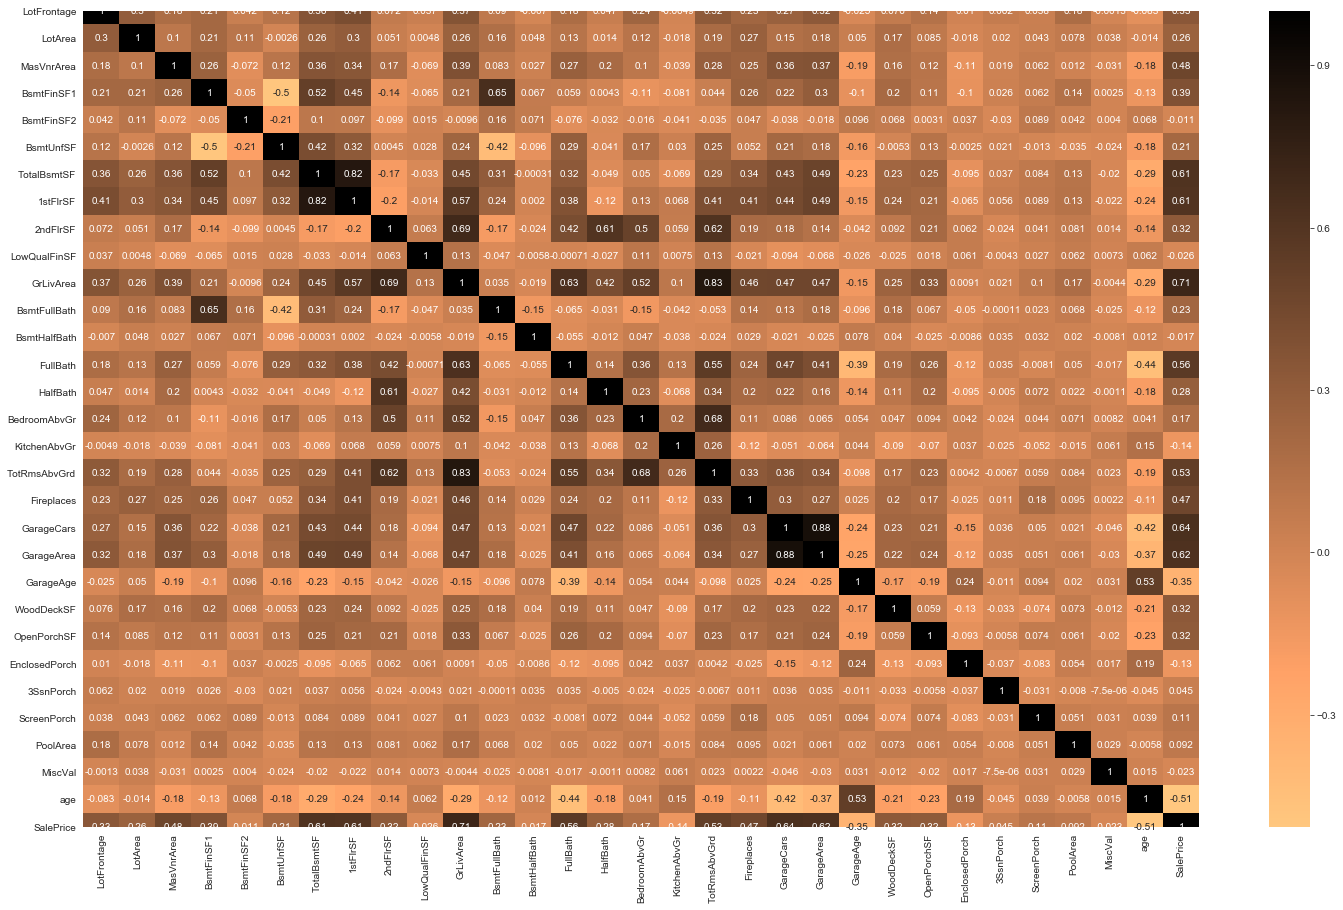

In [158]:
plt.figure(figsize=(25,15))
sns.heatmap(df[numerical].corr(),annot=True,cmap="copper_r")

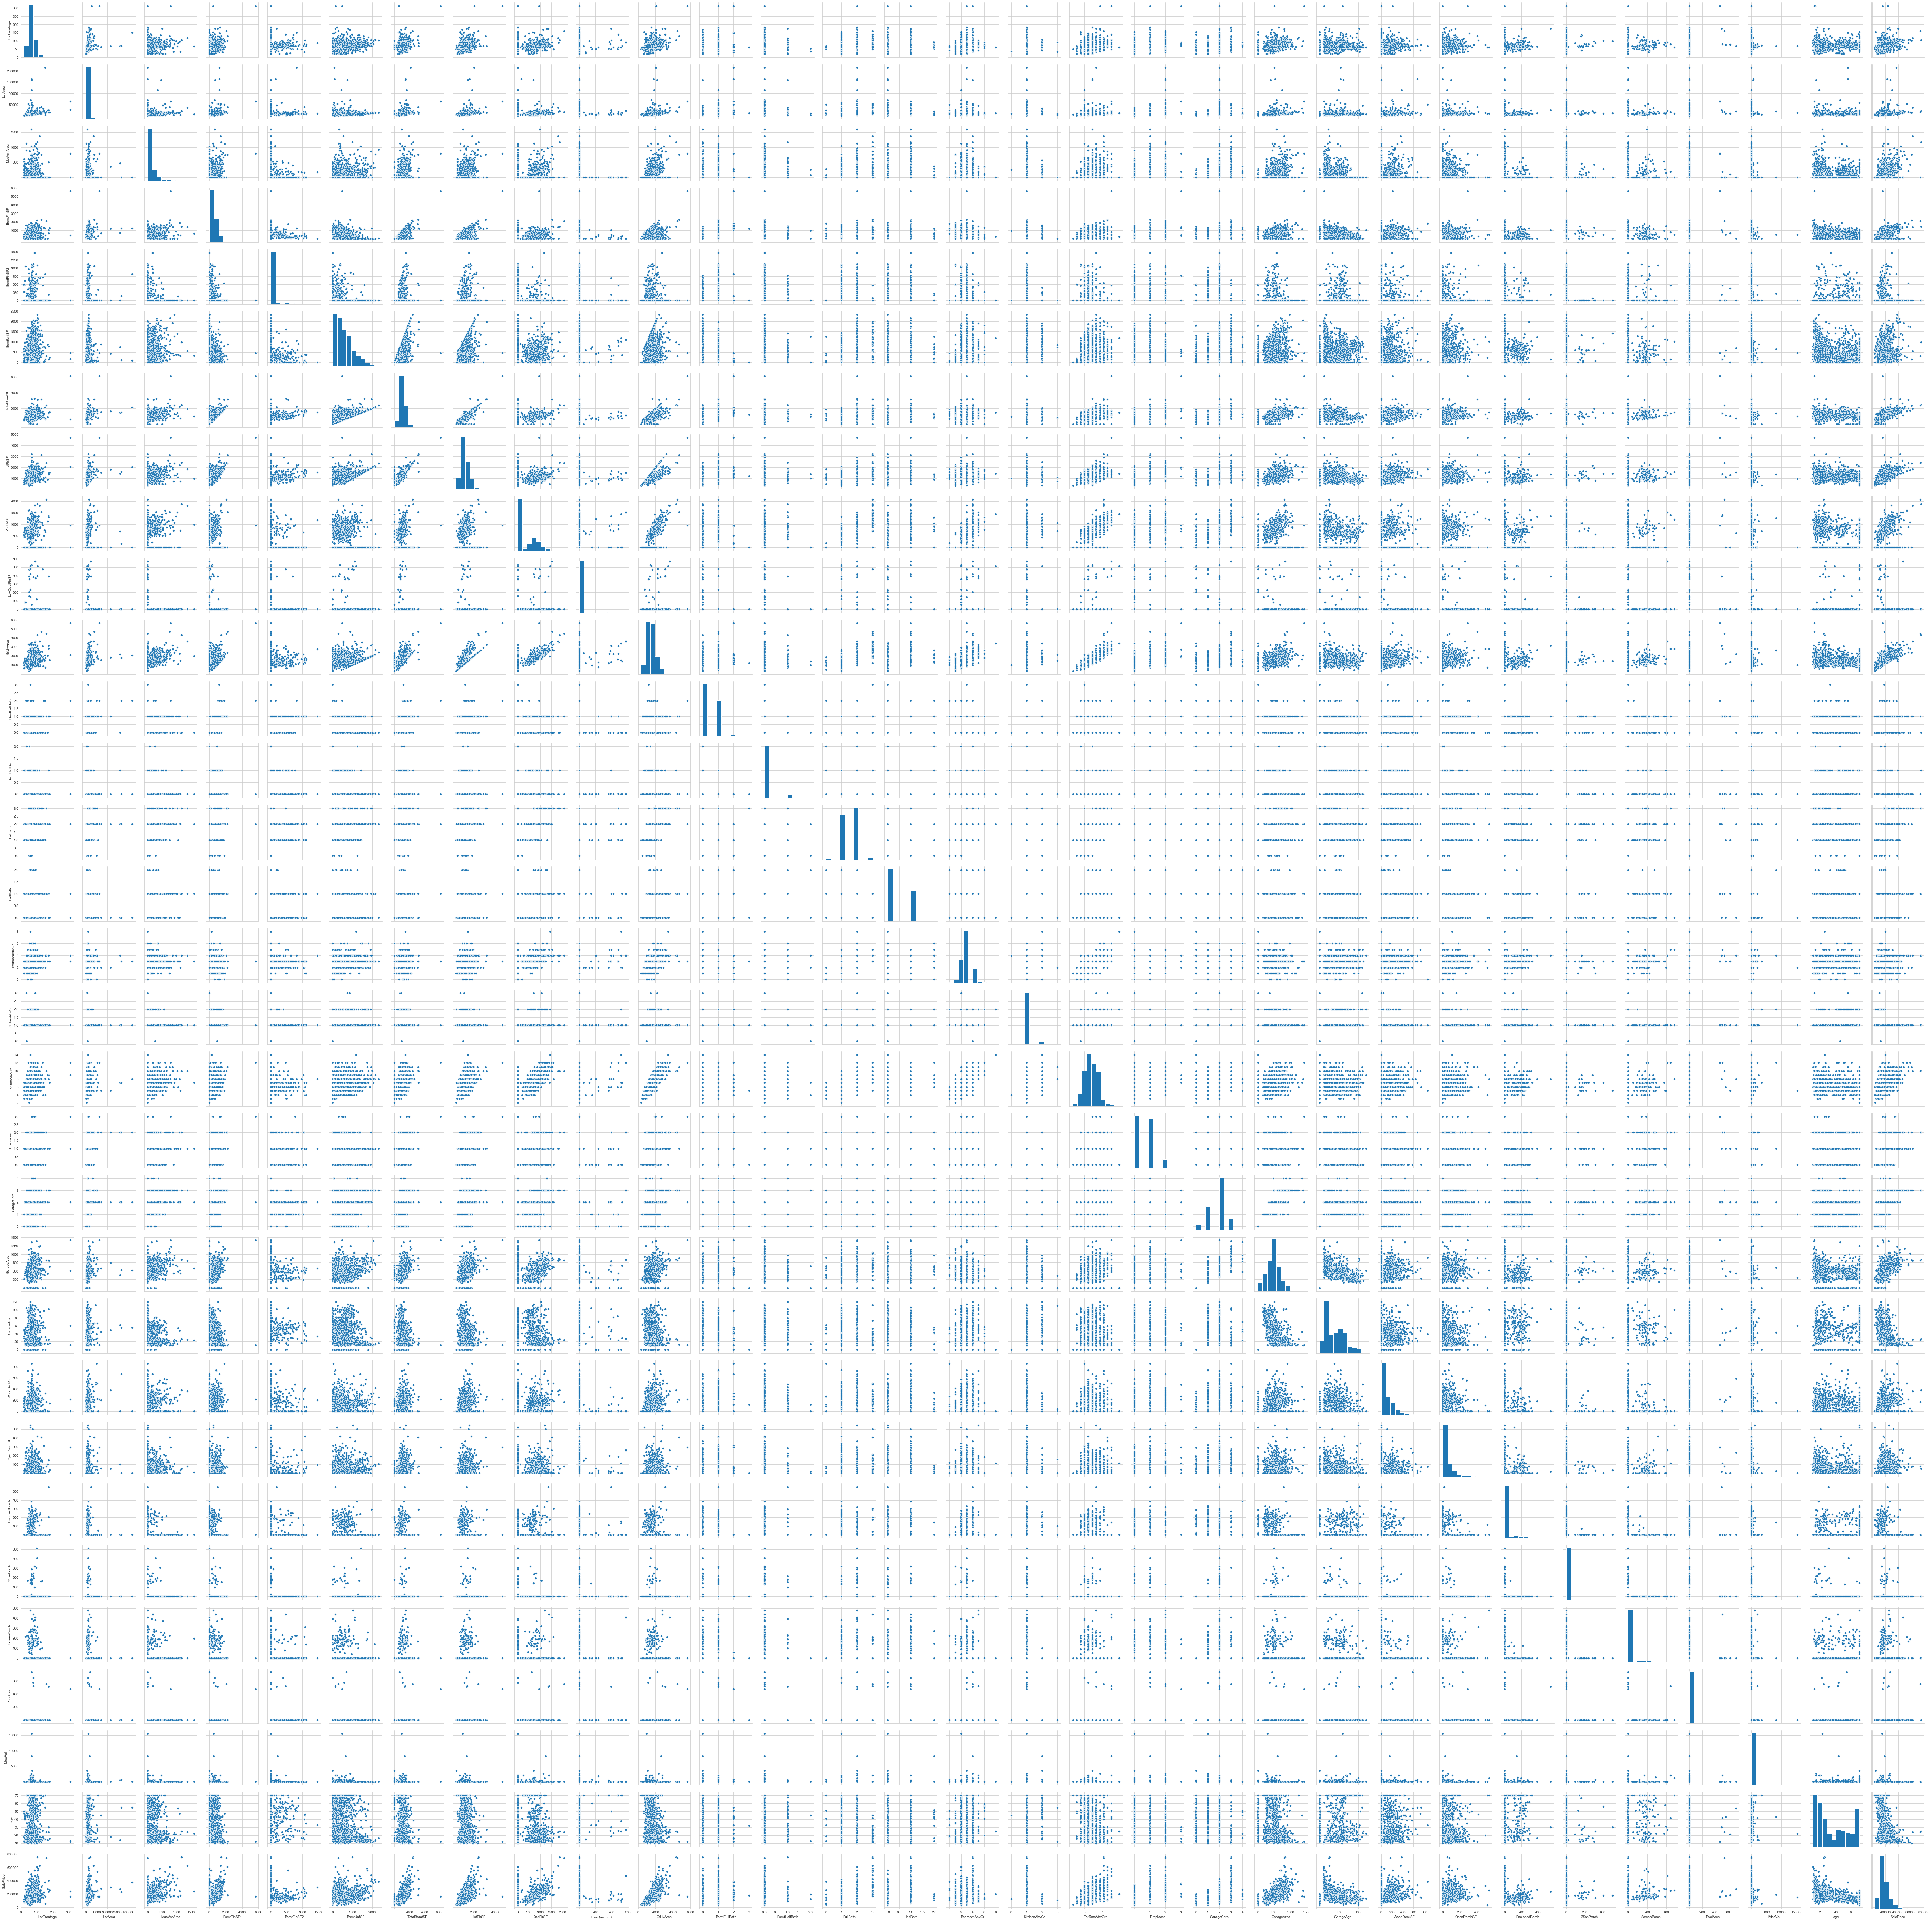

In [159]:
sns.pairplot(df[numerical])

**multivariate outliers**

In [161]:
outliers_list = []
for col in merged[:1460][numerical[:-1]].columns:
    
    Q1 = np.percentile(a=merged[:1460][col], q=25)
    Q3 = np.percentile(a=merged[:1460][col], q=75)

    IQR = Q3 - Q1
    ul = Q3+(1.5*IQR) 
    ll = Q1-(1.5*IQR)
    
    print(str(ul)+" < ol < "+str(ll))
    print("outlier in feature: "+col+"("+str(len(merged[:1460][(merged[:1460][col]>ul) | (merged[:1460][col]<ll)]))+")")
    display(merged[:1460][(merged[:1460][col]>ul) | (merged[:1460][col]<ll)])
    outliers_list=outliers_list + list(merged[:1460][(merged[:1460][col]>ul) | (merged[:1460][col]<ll)]['Id'])

107.5 < ol < 31.5
outlier in feature: LotFrontage(106)


Id  LotFrontage  LotArea  Utilities  OverallQual  OverallCond  \
25      26        110.0    14230          3            8            5   
35      36        108.0    13418          3            8            5   
36      37        112.0    10859          3            5            5   
41      42        115.0    16905          3            5            6   
52      53        110.0     8472          3            5            5   
...    ...          ...      ...        ...          ...          ...   
1359  1360        129.0    16737          3            9            5   
1361  1362        124.0    16158          3            7            5   
1364  1365         30.0     3180          3            7            5   
1378  1379         21.0     1953          3            6            5   
1449  1450         21.0     1533          3            5            7   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  Condition1_RRAn  \
25         640.0          3          2         3  ...                0   
35         132.0          3          2         4  ...                0   
36           0.0          2          2         3  ...                0   
41           0.0          2          3         2  ...                0   
52           0.0          1          2         3  ...                0   
...          ...        ...        ...       ...  ...              ...   
1359        66.0          3          2         4  ...                0   
1361        16.0          3          2         4  ...                0   
1364         0.0          3          2         3  ...                0   
1378       408.0          2          2         2  ...                0   
1449         0.0          2          2         3  ...                0   

      Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  \
25                  0                0                 0                1   
35                  0                0                 0                1   
36                  0                0                 0                1   
41                  0                0                 0                1   
52                  0                1                 0                1   
...               ...              ...               ...              ...   
1359                0                0                 0                1   
1361                0                0                 0                1   
1364                0                0                 0                1   
1378                0                0                 0                1   
1449                0                0                 0                1   

      Condition2_PosA  Condition2_PosN  Condition2_RRAe  Condition2_RRAn  \
25                  0                0                0                0   
35                  0                0                0                0   
36                  0                0                0                0   
41                  0                0                0                0   
52                  0                0                0                0   
...               ...              ...              ...              ...   
1359                0                0                0                0   
1361                0                0                0                0   
1364                0                0                0                0   
1378                0                0                0                0   
1449                0                0                0                0   

      Condition2_RRNn  
25                  0  
35                  0  
36                  0  
41                  0  
52                  0  
...               ...  
1359                0  
1361                0  
1364                0  
1378                0  
1449                0  

[106 rows x 244 columns]

17673.5 < ol < 1481.5
outlier in feature: LotArea(69)


Id  LotFrontage  LotArea  Utilities  OverallQual  OverallCond  \
53      54         68.0    50271          3            9            5   
66      67         69.0    19900          3            7            5   
113    114         69.0    21000          3            6            5   
120    121         69.0    21453          3            6            5   
159    160        134.0    19378          3            7            5   
...    ...          ...      ...        ...          ...          ...   
1396  1397         69.0    57200          3            5            5   
1409  1410         46.0    20544          3            7            6   
1423  1424         69.0    19690          3            6            7   
1430  1431         60.0    21930          3            5            5   
1446  1447         69.0    26142          3            5            7   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  Condition1_RRAn  \
53           0.0          3          2         4  ...                0   
66         287.0          2          2         3  ...                0   
113        184.0          2          3         3  ...                0   
120          0.0          2          2         2  ...                0   
159        456.0          3          2         3  ...                0   
...          ...        ...        ...       ...  ...              ...   
1396         0.0          2          2         2  ...                0   
1409       123.0          2          3         3  ...                0   
1423         0.0          3          3         3  ...                0   
1430         0.0          3          2         3  ...                1   
1446       189.0          2          2         2  ...                0   

      Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  \
53                  0                0                 0                1   
66                  0                0                 0                1   
113                 0                0                 0                1   
120                 0                0                 0                1   
159                 0                0                 0                1   
...               ...              ...               ...              ...   
1396                0                0                 0                1   
1409                0                0                 0                1   
1423                0                0                 0                1   
1430                0                0                 0                1   
1446                0                0                 0                1   

      Condition2_PosA  Condition2_PosN  Condition2_RRAe  Condition2_RRAn  \
53                  0                0                0                0   
66                  0                0                0                0   
113                 0                0                0                0   
120                 0                0                0                0   
159                 0                0                0                0   
...               ...              ...              ...              ...   
1396                0                0                0                0   
1409                0                0                0                0   
1423                0                0                0                0   
1430                0                0                0                0   
1446                0                0                0                0   

      Condition2_RRNn  
53                  0  
66                  0  
113                 0  
120                 0  
159                 0  
...               ...  
1396                0  
1409                0  
1423                0  
1430                0  
1446                0  

[69 rows x 244 columns]

415.0 < ol < -249.0
outlier in feature: MasVnrArea(96)


Id  LotFrontage  LotArea  Utilities  OverallQual  OverallCond  \
25      26        110.0    14230          3            8            5   
37      38         74.0     8532          3            5            6   
56      57         24.0     2645          3            8            5   
58      59         66.0    13682          3           10            5   
64      65         69.0     9375          3            7            5   
...    ...          ...      ...        ...          ...          ...   
1417  1418         69.0    16545          3            8            5   
1420  1421         90.0    11700          3            6            6   
1426  1427         81.0    10944          3            7            5   
1437  1438         96.0    12444          3            8            5   
1447  1448         80.0    10000          3            8            5   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  Condition1_RRAn  \
25         640.0          3          2         3  ...                0   
37         650.0          2          2         2  ...                0   
56         456.0          3          2         3  ...                0   
58        1031.0          4          2         4  ...                0   
64         573.0          2          2         3  ...                0   
...          ...        ...        ...       ...  ...              ...   
1417       731.0          3          2         3  ...                0   
1420       420.0          2          2         2  ...                0   
1426       448.0          3          2         3  ...                0   
1437       426.0          4          2         4  ...                0   
1447       438.0          3          2         3  ...                0   

      Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  \
25                  0                0                 0                1   
37                  0                0                 0                1   
56                  0                0                 0                1   
58                  0                0                 0                1   
64                  0                0                 0                1   
...               ...              ...               ...              ...   
1417                0                0                 0                1   
1420                0                0                 0                1   
1426                0                0                 0                1   
1437                0                0                 0                1   
1447                0                0                 0                1   

      Condition2_PosA  Condition2_PosN  Condition2_RRAe  Condition2_RRAn  \
25                  0                0                0                0   
37                  0                0                0                0   
56                  0                0                0                0   
58                  0                0                0                0   
64                  0                0                0                0   
...               ...              ...              ...              ...   
1417                0                0                0                0   
1420                0                0                0                0   
1426                0                0                0                0   
1437                0                0                0                0   
1447                0                0                0                0   

      Condition2_RRNn  
25                  0  
37                  0  
56                  0  
58                  0  
64                  0  
...               ...  
1417                0  
1420                0  
1426                0  
1437                0  
1447                0  

[96 rows x 244 columns]

1780.625 < ol < -1068.375
outlier in feature: BsmtFinSF1(7)


Id  LotFrontage  LotArea  Utilities  OverallQual  OverallCond  \
53      54         68.0    50271          3            9            5   
70      71         95.0    13651          3            7            6   
178    179         63.0    17423          3            9            5   
523    524        130.0    40094          3           10            5   
898    899        100.0    12919          3            9            5   
1182  1183        160.0    15623          3           10            5   
1298  1299        313.0    63887          3           10            5   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  Condition1_RRAn  \
53           0.0          3          2         4  ...                0   
70        1115.0          2          3         3  ...                0   
178        748.0          4          2         4  ...                0   
523        762.0          4          2         4  ...                0   
898        760.0          4          2         4  ...                0   
1182         0.0          3          2         4  ...                0   
1298       796.0          4          2         4  ...                0   

      Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  \
53                  0                0                 0                1   
70                  0                0                 0                1   
178                 0                0                 0                1   
523                 0                0                 0                0   
898                 0                0                 0                1   
1182                0                0                 0                1   
1298                0                0                 0                1   

      Condition2_PosA  Condition2_PosN  Condition2_RRAe  Condition2_RRAn  \
53                  0                0                0                0   
70                  0                0                0                0   
178                 0                0                0                0   
523                 0                1                0                0   
898                 0                0                0                0   
1182                0                0                0                0   
1298                0                0                0                0   

      Condition2_RRNn  
53                  0  
70                  0  
178                 0  
523                 0  
898                 0  
1182                0  
1298                0  

[7 rows x 244 columns]

0.0 < ol < 0.0
outlier in feature: BsmtFinSF2(167)


Id  LotFrontage  LotArea  Utilities  OverallQual  OverallCond  \
7        8         69.0    10382          3            7            6   
24      25         69.0     8246          3            5            8   
26      27         60.0     7200          3            5            7   
42      43         69.0     9180          3            5            7   
43      44         69.0     9200          3            5            6   
...    ...          ...      ...        ...          ...          ...   
1439  1440         80.0    11584          3            7            6   
1445  1446         70.0     8400          3            6            5   
1456  1457         85.0    13175          3            6            6   
1458  1459         68.0     9717          3            5            6   
1459  1460         75.0     9937          3            5            6   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  Condition1_RRAn  \
7          240.0          2          2         3  ...                0   
24           0.0          2          3         2  ...                0   
26           0.0          2          2         2  ...                0   
42           0.0          2          2         3  ...                0   
43           0.0          2          2         3  ...                0   
...          ...        ...        ...       ...  ...              ...   
1439        96.0          2          2         2  ...                0   
1445         0.0          2          2         2  ...                0   
1456       119.0          2          2         3  ...                0   
1458         0.0          2          2         2  ...                0   
1459         0.0          3          2         2  ...                0   

      Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  \
7                   0                0                 0                1   
24                  0                0                 0                1   
26                  0                0                 0                1   
42                  0                0                 0                1   
43                  0                0                 0                1   
...               ...              ...               ...              ...   
1439                0                0                 0                1   
1445                0                0                 0                1   
1456                0                0                 0                1   
1458                0                0                 0                1   
1459                0                0                 0                1   

      Condition2_PosA  Condition2_PosN  Condition2_RRAe  Condition2_RRAn  \
7                   0                0                0                0   
24                  0                0                0                0   
26                  0                0                0                0   
42                  0                0                0                0   
43                  0                0                0                0   
...               ...              ...              ...              ...   
1439                0                0                0                0   
1445                0                0                0                0   
1456                0                0                0                0   
1458                0                0                0                0   
1459                0                0                0                0   

      Condition2_RRNn  
7                   0  
24                  0  
26                  0  
42                  0  
43                  0  
...               ...  
1439                0  
1445                0  
1456                0  
1458                0  
1459                0  

[167 rows x 244 columns]

1685.5 < ol < -654.5
outlier in feature: BsmtUnfSF(29)


Id  LotFrontage  LotArea  Utilities  OverallQual  OverallCond  \
22      23         75.0     9742          3            8            5   
78      79         72.0    10778          3            4            5   
137    138         82.0    11070          3            7            5   
169    170         69.0    16669          3            8            6   
224    225        103.0    13472          3           10            5   
238    239         93.0    12030          3            8            5   
278    279        107.0    14450          3            9            5   
350    351         68.0     7820          3            9            5   
477    478        105.0    13693          3            9            5   
496    497         69.0    12692          3            8            5   
552    553         87.0    11146          3            8            5   
581    582         98.0    12704          3            8            5   
618    619         90.0    11694          3            9            5   
678    679         80.0    11844          3            8            5   
768    769         70.0     9100          3            7            5   
774    775        110.0    14226          3            8            5   
798    799        104.0    13518          3            9            5   
803    804        107.0    13891          3            9            5   
843    844         80.0     8000          3            5            4   
928    929         69.0    11838          3            8            5   
932    933         84.0    11670          3            9            5   
963    964        122.0    11923          3            9            5   
1008  1009         43.0    12118          3            7            5   
1046  1047         85.0    16056          3            9            5   
1166  1167         64.0    10475          3            8            5   
1241  1242         83.0     9849          3            7            6   
1267  1268         89.0    13214          3            9            5   
1318  1319         69.0    14781          3            8            5   
1324  1325         75.0     9986          3            8            5   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  Condition1_RRAn  \
22         281.0          3          2         3  ...                0   
78           0.0          2          2         2  ...                0   
137         70.0          2          2         2  ...                0   
169        653.0          3          2         3  ...                0   
224        922.0          4          2         4  ...                0   
238        254.0          4          2         4  ...                0   
278        315.0          4          2         4  ...                0   
350        362.0          4          2         4  ...                0   
477        772.0          4          2         3  ...                0   
496          0.0          3          2         3  ...                0   
552        250.0          3          2         4  ...                0   
581        306.0          4          2         4  ...                0   
618        452.0          4          2         4  ...                0   
678        464.0          3          2         4  ...                0   
768          0.0          3          2         3  ...                0   
774        375.0          3          2         3  ...                0   
798        860.0          4          2         4  ...                0   
803        424.0          4          2         4  ...                0   
843          0.0          2          2         2  ...                0   
928          0.0          3          2         3  ...                0   
932        302.0          4          2         4  ...                0   
963          0.0          3          2         4  ...                0   
1008       108.0          3          2         4  ...                0   
1046       208.0          3          2   

2052.0 < ol < 42.0
outlier in feature: TotalBsmtSF(61)


Id  LotFrontage  LotArea  Utilities  OverallQual  OverallCond  \
17      18         72.0    10791          3            4            5   
39      40         65.0     6040          3            4            5   
70      71         95.0    13651          3            7            6   
90      91         60.0     7200          3            4            5   
102    103         64.0     7018          3            5            5   
...    ...          ...      ...        ...          ...          ...   
1250  1251         93.0    11160          3            7            5   
1298  1299        313.0    63887          3           10            5   
1321  1322         69.0     6627          3            3            6   
1373  1374         69.0    11400          3           10            5   
1412  1413         60.0     7200          3            4            5   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  Condition1_RRAn  \
17           0.0          2          2        -1  ...                0   
39           0.0          2          2        -1  ...                0   
70        1115.0          2          3         3  ...                0   
90           0.0          2          2        -1  ...                0   
102          0.0          2          1        -1  ...                0   
...          ...        ...        ...       ...  ...              ...   
1250         0.0          3          2         2  ...                0   
1298       796.0          4          2         4  ...                0   
1321         0.0          2          2        -1  ...                0   
1373       705.0          4          2         4  ...                0   
1412         0.0          2          2        -1  ...                0   

      Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  \
17                  0                0                 0                1   
39                  0                0                 0                1   
70                  0                0                 0                1   
90                  0                0                 0                1   
102                 0                0                 0                1   
...               ...              ...               ...              ...   
1250                0                0                 0                1   
1298                0                0                 0                1   
1321                0                0                 0                1   
1373                0                0                 0                1   
1412                0                0                 0                1   

      Condition2_PosA  Condition2_PosN  Condition2_RRAe  Condition2_RRAn  \
17                  0                0                0                0   
39                  0                0                0                0   
70                  0                0                0                0   
90                  0                0                0                0   
102                 0                0                0                0   
...               ...              ...              ...              ...   
1250                0                0                0                0   
1298                0                0                0                0   
1321                0                0                0                0   
1373                0                0                0                0   
1412                0                0                0                0   

      Condition2_RRNn  
17                  0  
39                  0  
70                  0  
90                  0  
102                 0  
...               ...  
1250                0  
1298                0  
1321                0  
1373                0  
1412                0  

[61 rows x 244 columns]

2155.125 < ol < 118.125
outlier in feature: 1stFlrSF(20)


Id  LotFrontage  LotArea  Utilities  OverallQual  OverallCond  \
66      67         69.0    19900          3            7            5   
70      71         95.0    13651          3            7            6   
113    114         69.0    21000          3            6            5   
175    176         84.0    12615          3            6            7   
178    179         63.0    17423          3            9            5   
224    225        103.0    13472          3           10            5   
440    441        105.0    15431          3           10            5   
496    497         69.0    12692          3            8            5   
523    524        130.0    40094          3           10            5   
529    530         69.0    32668          3            6            3   
691    692        104.0    21535          3           10            6   
888    889         95.0    15865          3            8            6   
898    899        100.0    12919          3            9            5   
1024  1025         69.0    15498          3            8            6   
1044  1045         80.0     9600          3            8            5   
1182  1183        160.0    15623          3           10            5   
1205  1206         90.0    14684          3            7            7   
1298  1299        313.0    63887          3           10            5   
1346  1347         69.0    20781          3            7            7   
1373  1374         69.0    11400          3           10            5   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  Condition1_RRAn  \
66         287.0          2          2         3  ...                0   
70        1115.0          2          3         3  ...                0   
113        184.0          2          3         3  ...                0   
175          0.0          2          2         2  ...                0   
178        748.0          4          2         4  ...                0   
224        922.0          4          2         4  ...                0   
440        200.0          4          2         4  ...                0   
496          0.0          3          2         3  ...                0   
523        762.0          4          2         4  ...                0   
529          0.0          3          2         2  ...                0   
691       1170.0          4          2         4  ...                0   
888          0.0          3          3         2  ...                0   
898        760.0          4          2         4  ...                0   
1024         0.0          3          2         3  ...                0   
1044         0.0          3          2         3  ...                0   
1182         0.0          3          2         4  ...                0   
1205       234.0          3          2         3  ...                0   
1298       796.0          4          2         4  ...                0   
1346         0.0          2          2         2  ...                0   
1373       705.0          4          2         4  ...                0   

      Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  \
66                  0                0                 0                1   
70                  0                0                 0                1   
113                 0                0                 0                1   
175                 0                0                 0                1   
178                 0                0                 0                1   
224                 0                0                 0                1   
440                 0                0                 0                1   
496                 0                0                 0                1   
523                 0                0                 0                0   
529                 0                0                 0                1   
691                 0                0                 0                

1820.0 < ol < -1092.0
outlier in feature: 2ndFlrSF(2)


Id  LotFrontage  LotArea  Utilities  OverallQual  OverallCond  \
691    692        104.0    21535          3           10            6   
1182  1183        160.0    15623          3           10            5   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  Condition1_RRAn  \
691       1170.0          4          2         4  ...                0   
1182         0.0          3          2         4  ...                0   

      Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  \
691                 0                0                 0                1   
1182                0                0                 0                1   

      Condition2_PosA  Condition2_PosN  Condition2_RRAe  Condition2_RRAn  \
691                 0                0                0                0   
1182                0                0                0                0   

      Condition2_RRNn  
691                 0  
1182                0  

[2 rows x 244 columns]

0.0 < ol < 0.0
outlier in feature: LowQualFinSF(26)


Id  LotFrontage  LotArea  Utilities  OverallQual  OverallCond  \
51      52         52.0     6240          3            6            6   
88      89        105.0     8470          3            3            2   
125    126         60.0     6780          3            6            8   
170    171         69.0    12358          3            5            6   
185    186         90.0    22950          3           10            9   
187    188         60.0    10410          3            5            7   
197    198        174.0    25419          3            8            4   
198    199         92.0     5520          3            6            6   
263    264         50.0     5500          3            5            7   
267    268         60.0     8400          3            5            8   
406    407         51.0    10480          3            6            5   
589    590         50.0     9100          3            5            6   
635    636         60.0    10896          3            6            7   
729    730         52.0     6240          3            4            5   
829    830         24.0     2544          3            7            5   
831    832         30.0     3180          3            7            5   
868    869         69.0    14762          3            5            6   
873    874         60.0    12144          3            5            7   
883    884         60.0     6204          3            4            5   
945    946         98.0     8820          3            5            6   
1009  1010         60.0     6000          3            5            5   
1031  1032        102.0    15863          3            7            3   
1173  1174        138.0    18030          3            5            6   
1349  1350         50.0     5250          3            8            5   
1364  1365         30.0     3180          3            7            5   
1440  1441         79.0    11526          3            6            7   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  Condition1_RRAn  \
51           0.0          2          2         2  ...                0   
88           0.0          1          1         2  ...                0   
125          0.0          2          1         2  ...                0   
170          0.0          2          2         2  ...                0   
185          0.0          3          3         2  ...                0   
187          0.0          2          2         1  ...                0   
197          0.0          3          3         2  ...                0   
198          0.0          2          2         2  ...                0   
263          0.0          2          2         2  ...                0   
267          0.0          2          2         2  ...                0   
406          0.0          2          2         2  ...                0   
589          0.0          2          2         2  ...                1   
635          0.0          1          2         2  ...                0   
729          0.0          2          2         2  ...                0   
829          0.0          3          2         3  ...                0   
831          0.0          2          2         3  ...                0   
868          0.0          2          2        -1  ...                0   
873          0.0          3          2         2  ...                0   
883          0.0          3          2         2  ...                0   
945          0.0          2          2         2  ...                0   
1009         0.0          2          1         2  ...                0   
1031         0.0          2          2         2  ...                0   
1173         0.0          2          2         2  ...                0   
1349         0.0          2          3         2  ...                0   
1364         0.0          3          2         3  ...                0   
1440         0.0          2          2         4  ...                0   

      Condition1_RRNe  Condition1_RRN

2747.625 < ol < 158.625
outlier in feature: GrLivArea(31)


Id  LotFrontage  LotArea  Utilities  OverallQual  OverallCond  \
58      59         66.0    13682          3           10            5   
118    119         90.0    12376          3            7            5   
185    186         90.0    22950          3           10            9   
197    198        174.0    25419          3            8            4   
231    232        174.0    15138          3            8            5   
304    305         87.0    18386          3            7            9   
324    325         96.0    11275          3            7            7   
496    497         69.0    12692          3            8            5   
523    524        130.0    40094          3           10            5   
583    584         75.0    13500          3           10            9   
608    609         78.0    12168          3            8            6   
635    636         60.0    10896          3            6            7   
691    692        104.0    21535          3           10            6   
769    770         47.0    53504          3            8            5   
798    799        104.0    13518          3            9            5   
803    804        107.0    13891          3            9            5   
961    962         69.0    12227          3            6            7   
1024  1025         69.0    15498          3            8            6   
1031  1032        102.0    15863          3            7            3   
1046  1047         85.0    16056          3            9            5   
1142  1143         77.0     9965          3            8            5   
1169  1170        118.0    35760          3           10            5   
1173  1174        138.0    18030          3            5            6   
1175  1176         85.0    10678          3            8            5   
1182  1183        160.0    15623          3           10            5   
1268  1269         69.0    14100          3            8            9   
1298  1299        313.0    63887          3           10            5   
1312  1313         69.0     9572          3            8            5   
1328  1329         60.0    10440          3            6            7   
1353  1354         56.0    14720          3            8            5   
1386  1387         80.0    16692          3            7            5   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  Condition1_RRAn  \
58        1031.0          4          2         4  ...                0   
118          0.0          2          2         3  ...                0   
185          0.0          3          3         2  ...                0   
197          0.0          3          3         2  ...                0   
231        506.0          3          2         3  ...                0   
304          0.0          2          2         2  ...                0   
324        300.0          3          3         3  ...                0   
496          0.0          3          2         3  ...                0   
523        762.0          4          2         4  ...                0   
583          0.0          4          4         2  ...                0   
608          0.0          2          2         3  ...                0   
635          0.0          1          2         2  ...                0   
691       1170.0          4          2         4  ...                0   
769        603.0          4          2         3  ...                0   
798        860.0          4          2         4  ...                0   
803        424.0          4          2         4  ...                0   
961        424.0          2          3         3  ...                0   
1024         0.0          3          2         3  ...                0   
1031         0.0          2          2         2  ...                0   
1046       208.0          3          2         4  ...                0   
1142       340.0          3          2         4  ...                0   
1169      1378.0          3          3     

2.5 < ol < -1.5
outlier in feature: BsmtFullBath(1)


Id  LotFrontage  LotArea  Utilities  OverallQual  OverallCond  \
738  739         60.0    10800          3            5            5   

     MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  Condition1_RRAn  \
738         0.0          2          2         3  ...                0   

     Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  \
738                0                0                 0                1   

     Condition2_PosA  Condition2_PosN  Condition2_RRAe  Condition2_RRAn  \
738                0                0                0                0   

     Condition2_RRNn  
738                0  

[1 rows x 244 columns]

0.0 < ol < 0.0
outlier in feature: BsmtHalfBath(82)


Id  LotFrontage  LotArea  Utilities  OverallQual  OverallCond  \
1        2         80.0     9600          3            6            8   
26      27         60.0     7200          3            5            7   
33      34         70.0    10552          3            5            5   
37      38         74.0     8532          3            5            6   
41      42        115.0    16905          3            5            6   
...    ...          ...      ...        ...          ...          ...   
1335  1336         80.0     9650          3            6            5   
1350  1351         91.0    11643          3            5            5   
1389  1390         60.0     6000          3            6            6   
1405  1406         44.0     3842          3            8            5   
1415  1416         51.0     3635          3            7            5   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  Condition1_RRAn  \
1            0.0          2          2         3  ...                0   
26           0.0          2          2         2  ...                0   
33           0.0          2          2         2  ...                0   
37         650.0          2          2         2  ...                0   
41           0.0          2          3         2  ...                0   
...          ...        ...        ...       ...  ...              ...   
1335       360.0          2          2         3  ...                0   
1350       368.0          2          2         2  ...                0   
1389         0.0          2          3         2  ...                0   
1405       174.0          3          2         4  ...                0   
1415       130.0          3          2         3  ...                0   

      Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  \
1                   0                0                 0                1   
26                  0                0                 0                1   
33                  0                0                 0                1   
37                  0                0                 0                1   
41                  0                0                 0                1   
...               ...              ...               ...              ...   
1335                0                0                 0                1   
1350                0                0                 0                1   
1389                0                0                 0                1   
1405                0                0                 0                1   
1415                0                0                 0                1   

      Condition2_PosA  Condition2_PosN  Condition2_RRAe  Condition2_RRAn  \
1                   0                0                0                0   
26                  0                0                0                0   
33                  0                0                0                0   
37                  0                0                0                0   
41                  0                0                0                0   
...               ...              ...              ...              ...   
1335                0                0                0                0   
1350                0                0                0                0   
1389                0                0                0                0   
1405                0                0                0                0   
1415                0                0                0                0   

      Condition2_RRNn  
1                   0  
26                  0  
33                  0  
37                  0  
41                  0  
...               ...  
1335                0  
1350                0  
1389                0  
1405                0  
1415                0  

[82 rows x 244 columns]

3.5 < ol < -0.5
outlier in feature: FullBath(0)


Empty DataFrame
Columns: [Id, LotFrontage, LotArea, Utilities, OverallQual, OverallCond, MasVnrArea, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, HeatingQC, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Fireplaces, FireplaceQu, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, MiscVal, YrSold, MSSubClass_30, MSSubClass_40, MSSubClass_45, MSSubClass_50, MSSubClass_60, MSSubClass_70, MSSubClass_75, MSSubClass_80, MSSubClass_85, MSSubClass_90, MSSubClass_120, MSSubClass_150, MSSubClass_160, MSSubClass_180, MSSubClass_190, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, Alley_Pave, Alley_no alley, LandContour_HLS, LandContour_Low, LandContour_Lvl, LotShape_IR2, LotShape_IR3, LotShape_Reg, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, ...]
Index: []

[0 rows x 244 columns]

2.5 < ol < -1.5
outlier in feature: HalfBath(0)


Empty DataFrame
Columns: [Id, LotFrontage, LotArea, Utilities, OverallQual, OverallCond, MasVnrArea, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, HeatingQC, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Fireplaces, FireplaceQu, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, MiscVal, YrSold, MSSubClass_30, MSSubClass_40, MSSubClass_45, MSSubClass_50, MSSubClass_60, MSSubClass_70, MSSubClass_75, MSSubClass_80, MSSubClass_85, MSSubClass_90, MSSubClass_120, MSSubClass_150, MSSubClass_160, MSSubClass_180, MSSubClass_190, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, Alley_Pave, Alley_no alley, LandContour_HLS, LandContour_Low, LandContour_Lvl, LotShape_IR2, LotShape_IR3, LotShape_Reg, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, ...]
Index: []

[0 rows x 244 columns]

4.5 < ol < 0.5
outlier in feature: BedroomAbvGr(35)


Id  LotFrontage  LotArea  Utilities  OverallQual  OverallCond  \
53      54         68.0    50271          3            9            5   
118    119         90.0    12376          3            7            5   
137    138         82.0    11070          3            7            5   
144    145         70.0     9100          3            5            5   
189    190         41.0     4923          3            8            5   
198    199         92.0     5520          3            6            6   
291    292         55.0     5687          3            5            6   
324    325         96.0    11275          3            7            7   
328    329         69.0    11888          3            6            6   
330    331         69.0    10624          3            5            4   
386    387         58.0     8410          3            5            3   
570    571         74.0    13101          3            5            5   
628    629         70.0    11606          3            5            5   
634    635         64.0     6979          3            6            5   
635    636         60.0    10896          3            6            7   
789    790         69.0    12205          3            6            8   
843    844         80.0     8000          3            5            4   
848    849         75.0    45600          3            6            8   
883    884         60.0     6204          3            4            5   
897    898         64.0     7018          3            5            5   
910    911         80.0    11600          3            5            5   
1030  1031         69.0     7082          3            5            8   
1031  1032        102.0    15863          3            7            3   
1032  1033         69.0    14541          3            8            7   
1062  1063         85.0    13600          3            5            5   
1068  1069         42.0     3964          3            6            4   
1132  1133         90.0     9900          3            6            4   
1163  1164         60.0    12900          3            4            4   
1213  1214         69.0    10246          3            4            9   
1262  1263         69.0    11250          3            4            5   
1270  1271         69.0    23595          3            7            6   
1328  1329         60.0    10440          3            6            7   
1350  1351         91.0    11643          3            5            5   
1386  1387         80.0    16692          3            7            5   
1387  1388         60.0     8520          3            6            7   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  Condition1_RRAn  \
53           0.0          3          2         4  ...                0   
118          0.0          2          2         3  ...                0   
137         70.0          2          2         2  ...                0   
144        336.0          2          2         2  ...                0   
189          0.0          3          2         4  ...                0   
198          0.0          2          2         2  ...                0   
291          0.0          2          1         2  ...                0   
324        300.0          3          3         3  ...                0   
328          0.0          2          2         2  ...                0   
330         84.0          2          2         2  ...                0   
386          0.0          2          1         2  ...                0   
570        108.0          2          2         2  ...                0   
628        192.0          2          2         3  ...                0   
634          0.0          2          2         2  ...                0   
635          0.0          1          2         2  ...                0   
789        157.0          2          2         2  ...                0   
843          0.0          2          2         2  ...                0   
848          0.0          2          2         

1.0 < ol < 1.0
outlier in feature: KitchenAbvGr(68)


Id  LotFrontage  LotArea  Utilities  OverallQual  OverallCond  \
8        9         51.0     6120          3            7            5   
9       10         50.0     7420          3            5            6   
17      18         72.0    10791          3            4            5   
39      40         65.0     6040          3            4            5   
48      49         33.0     4456          3            4            5   
...    ...          ...      ...        ...          ...          ...   
1391  1392         65.0     8944          3            5            5   
1393  1394         60.0    10800          3            6            7   
1412  1413         60.0     7200          3            4            5   
1416  1417         60.0    11340          3            4            6   
1450  1451         60.0     9000          3            5            5   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  Condition1_RRAn  \
8            0.0          2          2         2  ...                0   
9            0.0          2          2         2  ...                0   
17           0.0          2          2        -1  ...                0   
39           0.0          2          2        -1  ...                0   
48           0.0          2          2         2  ...                0   
...          ...        ...        ...       ...  ...              ...   
1391         0.0          2          2         2  ...                0   
1393         0.0          2          2         1  ...                0   
1412         0.0          2          2        -1  ...                0   
1416         0.0          2          2         2  ...                0   
1450         0.0          2          2         3  ...                0   

      Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  \
8                   0                0                 0                1   
9                   0                0                 0                0   
17                  0                0                 0                1   
39                  0                0                 0                1   
48                  0                0                 0                1   
...               ...              ...               ...              ...   
1391                0                0                 0                1   
1393                0                0                 0                1   
1412                0                0                 0                1   
1416                0                0                 0                1   
1450                0                0                 0                1   

      Condition2_PosA  Condition2_PosN  Condition2_RRAe  Condition2_RRAn  \
8                   0                0                0                0   
9                   0                0                0                0   
17                  0                0                0                0   
39                  0                0                0                0   
48                  0                0                0                0   
...               ...              ...              ...              ...   
1391                0                0                0                0   
1393                0                0                0                0   
1412                0                0                0                0   
1416                0                0                0                0   
1450                0                0                0                0   

      Condition2_RRNn  
8                   0  
9                   0  
17                  0  
39                  0  
48                  0  
...               ...  
1391                0  
1393                0  
1412                0  
1416                0  
1450                0  

[68 rows x 244 columns]

10.0 < ol < 2.0
outlier in feature: TotRmsAbvGrd(30)


Id  LotFrontage  LotArea  Utilities  OverallQual  OverallCond  \
11      12         85.0    11924          3            9            5   
118    119         90.0    12376          3            7            5   
185    186         90.0    22950          3           10            9   
324    325         96.0    11275          3            7            7   
523    524        130.0    40094          3           10            5   
527    528         67.0    14948          3            9            5   
566    567         77.0    11198          3            9            5   
635    636         60.0    10896          3            6            7   
745    746         69.0     8963          3            8            9   
769    770         47.0    53504          3            8            5   
798    799        104.0    13518          3            9            5   
803    804        107.0    13891          3            9            5   
809    810         90.0     8100          3            5            5   
875    876         75.0     9000          3            8            5   
897    898         64.0     7018          3            5            5   
898    899        100.0    12919          3            9            5   
910    911         80.0    11600          3            5            5   
961    962         69.0    12227          3            6            7   
1031  1032        102.0    15863          3            7            3   
1046  1047         85.0    16056          3            9            5   
1142  1143         77.0     9965          3            8            5   
1173  1174        138.0    18030          3            5            6   
1230  1231         69.0    18890          3            5            5   
1268  1269         69.0    14100          3            8            9   
1292  1293         60.0     6600          3            5            4   
1298  1299        313.0    63887          3           10            5   
1350  1351         91.0    11643          3            5            5   
1386  1387         80.0    16692          3            7            5   
1416  1417         60.0    11340          3            4            6   
1440  1441         79.0    11526          3            6            7   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  Condition1_RRAn  \
11         286.0          4          2         4  ...                0   
118          0.0          2          2         3  ...                0   
185          0.0          3          3         2  ...                0   
324        300.0          3          3         3  ...                0   
523        762.0          4          2         4  ...                0   
527        268.0          4          2         4  ...                0   
566        245.0          3          2         3  ...                0   
635          0.0          1          2         2  ...                0   
745        289.0          4          3         2  ...                0   
769        603.0          4          2         3  ...                0   
798        860.0          4          2         4  ...                0   
803        424.0          4          2         4  ...                0   
809          0.0          2          2         2  ...                0   
875          0.0          3          2         3  ...                0   
897          0.0          2          2        -1  ...                0   
898        760.0          4          2         4  ...                0   
910        361.0          2          2         2  ...                0   
961        424.0          2          3         3  ...                0   
1031         0.0          2          2         2  ...                0   
1046       208.0          3          2         4  ...                0   
1142       340.0          3          2         4  ...                0   
1173         0.0          2          2         2  ...                0   
1230         0.0          2          2    

2.5 < ol < -1.5
outlier in feature: Fireplaces(5)


Id  LotFrontage  LotArea  Utilities  OverallQual  OverallCond  \
166    167         69.0    10708          3            5            5   
309    310         90.0    12378          3            9            5   
605    606         85.0    13600          3            7            6   
642    643         75.0    13860          3            8            7   
1298  1299        313.0    63887          3           10            5   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  Condition1_RRAn  \
166          0.0          3          2         2  ...                0   
309          0.0          3          2         4  ...                0   
605        176.0          2          2         2  ...                0   
642          0.0          3          2         3  ...                0   
1298       796.0          4          2         4  ...                0   

      Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  \
166                 0                0                 0                1   
309                 0                0                 0                1   
605                 0                0                 0                1   
642                 0                0                 0                1   
1298                0                0                 0                1   

      Condition2_PosA  Condition2_PosN  Condition2_RRAe  Condition2_RRAn  \
166                 0                0                0                0   
309                 0                0                0                0   
605                 0                0                0                0   
642                 0                0                0                0   
1298                0                0                0                0   

      Condition2_RRNn  
166                 0  
309                 0  
605                 0  
642                 0  
1298                0  

[5 rows x 244 columns]

3.5 < ol < -0.5
outlier in feature: GarageCars(5)


Id  LotFrontage  LotArea  Utilities  OverallQual  OverallCond  \
420    421         78.0     7060          3            7            5   
747    748         65.0    11700          3            7            7   
1190  1191         69.0    32463          3            4            4   
1340  1341         70.0     8294          3            4            5   
1350  1351         91.0    11643          3            5            5   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  Condition1_RRAn  \
420        200.0          2          3         3  ...                0   
747          0.0          3          2         2  ...                0   
1190       149.0          2          3         2  ...                0   
1340         0.0          2          2         2  ...                0   
1350       368.0          2          2         2  ...                0   

      Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  \
420                 0                0                 0                1   
747                 0                0                 0                1   
1190                0                0                 0                1   
1340                0                0                 0                1   
1350                0                0                 0                1   

      Condition2_PosA  Condition2_PosN  Condition2_RRAe  Condition2_RRAn  \
420                 0                0                0                0   
747                 0                0                0                0   
1190                0                0                0                0   
1340                0                0                0                0   
1350                0                0                0                0   

      Condition2_RRNn  
420                 0  
747                 0  
1190                0  
1340                0  
1350                0  

[5 rows x 244 columns]

938.25 < ol < -27.75
outlier in feature: GarageArea(21)


Id  LotFrontage  LotArea  Utilities  OverallQual  OverallCond  \
178    179         63.0    17423          3            9            5   
224    225        103.0    13472          3           10            5   
270    271         84.0    10728          3            8            5   
317    318         75.0     9000          3            8            5   
408    409        109.0    14154          3            7            5   
581    582         98.0    12704          3            8            5   
664    665         49.0    20896          3            8            5   
718    719         96.0    10542          3            7            5   
803    804        107.0    13891          3            9            5   
825    826        114.0    14803          3           10            5   
1061  1062        120.0    18000          3            3            4   
1087  1088         85.0    10574          3            8            5   
1142  1143         77.0     9965          3            8            5   
1184  1185         50.0    35133          3            5            4   
1190  1191         69.0    32463          3            4            4   
1228  1229         65.0     8769          3            9            5   
1241  1242         83.0     9849          3            7            6   
1268  1269         69.0    14100          3            8            9   
1298  1299        313.0    63887          3           10            5   
1350  1351         91.0    11643          3            5            5   
1417  1418         69.0    16545          3            8            5   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  Condition1_RRAn  \
178        748.0          4          2         4  ...                0   
224        922.0          4          2         4  ...                0   
270          0.0          3          2         3  ...                0   
317          0.0          3          2         3  ...                0   
408        350.0          3          2         4  ...                0   
581        306.0          4          2         4  ...                0   
664          0.0          3          2         4  ...                1   
718        651.0          3          2         3  ...                0   
803        424.0          4          2         4  ...                0   
825        816.0          4          2         4  ...                0   
1061         0.0          1          2         2  ...                0   
1087         0.0          3          2         3  ...                0   
1142       340.0          3          2         4  ...                0   
1184       226.0          2          2         2  ...                0   
1190       149.0          2          3         2  ...                0   
1228       766.0          4          2         4  ...                0   
1241       206.5          3          2         3  ...                0   
1268       632.0          2          3         2  ...                0   
1298       796.0          4          2         4  ...                0   
1350       368.0          2          2         2  ...                0   
1417       731.0          3          2         3  ...                0   

      Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  \
178                 0                0                 0                1   
224                 0                0                 0                1   
270                 0                0                 0                1   
317                 0                0                 0                1   
408                 0                0                 0                1   
581                 0                0                 0                1   
664                 0                0                 0                1   
718                 0                0                 0                1   
803                 0                0                 0                1   
82

119.5 < ol < -44.5
outlier in feature: GarageAge(1)


Id  LotFrontage  LotArea  Utilities  OverallQual  OverallCond  MasVnrArea  \
93  94         60.0     7200          3            6            6         0.0   

    ExterQual  ExterCond  BsmtQual  ...  Condition1_RRAn  Condition1_RRNe  \
93          2          2         2  ...                0                0   

    Condition1_RRNn  Condition2_Feedr  Condition2_Norm  Condition2_PosA  \
93                0                 0                1                0   

    Condition2_PosN  Condition2_RRAe  Condition2_RRAn  Condition2_RRNn  
93                0                0                0                0  

[1 rows x 244 columns]

420.0 < ol < -252.0
outlier in feature: WoodDeckSF(32)


Id  LotFrontage  LotArea  Utilities  OverallQual  OverallCond  \
53      54         68.0    50271          3            9            5   
64      65         69.0     9375          3            7            5   
166    167         69.0    10708          3            5            5   
169    170         69.0    16669          3            8            6   
172    173         44.0     5306          3            7            7   
302    303        118.0    13704          3            7            5   
335    336         69.0   164660          3            5            6   
343    344         63.0     8849          3            9            5   
357    358         44.0     4224          3            5            5   
480    481         98.0    16033          3            9            5   
538    539         69.0    11553          3            5            5   
661    662         52.0    46589          3            8            7   
674    675         80.0     9200          3            6            6   
769    770         47.0    53504          3            8            5   
828    829         69.0    28698          3            5            5   
848    849         75.0    45600          3            6            8   
893    894         69.0    13284          3            5            5   
951    952         60.0     7800          3            5            5   
961    962         69.0    12227          3            6            7   
974    975         60.0    11414          3            7            8   
1044  1045         80.0     9600          3            8            5   
1068  1069         42.0     3964          3            6            4   
1076  1077         60.0    10800          3            5            8   
1130  1131         65.0     7804          3            4            3   
1141  1142         69.0    10304          3            5            7   
1190  1191         69.0    32463          3            4            4   
1210  1211         70.0    11218          3            6            5   
1312  1313         69.0     9572          3            8            5   
1313  1314        108.0    14774          3            9            5   
1423  1424         69.0    19690          3            6            7   
1440  1441         79.0    11526          3            6            7   
1459  1460         75.0     9937          3            5            6   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  Condition1_RRAn  \
53           0.0          3          2         4  ...                0   
64         573.0          2          2         3  ...                0   
166          0.0          3          2         2  ...                0   
169        653.0          3          2         3  ...                0   
172          0.0          3          3         3  ...                0   
302        150.0          3          2         3  ...                0   
335          0.0          2          2         2  ...                0   
343        616.0          4          2         4  ...                0   
357          0.0          2          2         3  ...                0   
480        378.0          3          2         4  ...                0   
538        188.0          2          2         2  ...                0   
661        528.0          3          2         3  ...                0   
674          0.0          2          2         2  ...                0   
769        603.0          4          2         3  ...                0   
828          0.0          2          2         2  ...                0   
848          0.0          2          2         2  ...                0   
893          0.0          2          2         3  ...                0   
951          0.0          2          2         2  ...                0   
961        424.0          2          3         3  ...                0   
974          0.0          2          3         3  ...                1   
1044         0.0          3          2      

170.0 < ol < -102.0
outlier in feature: OpenPorchSF(77)


Id  LotFrontage  LotArea  Utilities  OverallQual  OverallCond  \
7        8         69.0    10382          3            7            6   
14      15         69.0    10920          3            6            5   
28      29         47.0    16321          3            5            6   
81      82         32.0     4500          3            6            5   
87      88         40.0     3951          3            6            5   
...    ...          ...      ...        ...          ...          ...   
1336  1337         87.0     9246          3            5            5   
1354  1355         69.0    10316          3            7            5   
1369  1370         48.0    10635          3            8            5   
1374  1375         85.0    10625          3            7            5   
1423  1424         69.0    19690          3            6            7   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  Condition1_RRAn  \
7          240.0          2          2         3  ...                0   
14         212.0          2          2         2  ...                0   
28           0.0          2          2         2  ...                0   
81         443.0          2          3         4  ...                0   
87          76.0          3          2         3  ...                0   
...          ...        ...        ...       ...  ...              ...   
1336       564.0          2          2         2  ...                0   
1354         0.0          3          2         3  ...                0   
1369       171.0          3          2         3  ...                0   
1374         0.0          3          2         3  ...                0   
1423         0.0          3          3         3  ...                0   

      Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  \
7                   0                0                 0                1   
14                  0                0                 0                1   
28                  0                0                 0                1   
81                  0                0                 0                1   
87                  0                0                 0                1   
...               ...              ...               ...              ...   
1336                0                0                 0                1   
1354                0                0                 0                1   
1369                0                0                 0                1   
1374                0                0                 0                1   
1423                0                0                 0                1   

      Condition2_PosA  Condition2_PosN  Condition2_RRAe  Condition2_RRAn  \
7                   0                0                0                0   
14                  0                0                0                0   
28                  0                0                0                0   
81                  0                0                0                0   
87                  0                0                0                0   
...               ...              ...              ...              ...   
1336                0                0                0                0   
1354                0                0                0                0   
1369                0                0                0                0   
1374                0                0                0                0   
1423                0                0                0                0   

      Condition2_RRNn  
7                   0  
14                  0  
28                  0  
81                  0  
87                  0  
...               ...  
1336                0  
1354                0  
1369                0  
1374                0  
1423                0  

[77 rows x 244 columns]

0.0 < ol < 0.0
outlier in feature: EnclosedPorch(208)


Id  LotFrontage  LotArea  Utilities  OverallQual  OverallCond  \
3        4         60.0     9550          3            7            5   
7        8         69.0    10382          3            7            6   
8        9         51.0     6120          3            7            5   
14      15         69.0    10920          3            6            5   
21      22         57.0     7449          3            7            7   
...    ...          ...      ...        ...          ...          ...   
1429  1430         69.0    12546          3            6            7   
1438  1439         90.0     7407          3            6            7   
1439  1440         80.0    11584          3            7            6   
1445  1446         70.0     8400          3            6            5   
1458  1459         68.0     9717          3            5            6   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  Condition1_RRAn  \
3            0.0          2          2         2  ...                0   
7          240.0          2          2         3  ...                0   
8            0.0          2          2         2  ...                0   
14         212.0          2          2         2  ...                0   
21           0.0          2          2         2  ...                0   
...          ...        ...        ...       ...  ...              ...   
1429       310.0          3          3         3  ...                0   
1438         0.0          2          2         2  ...                0   
1439        96.0          2          2         2  ...                0   
1445         0.0          2          2         2  ...                0   
1458         0.0          2          2         2  ...                0   

      Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  \
3                   0                0                 0                1   
7                   0                0                 0                1   
8                   0                0                 0                1   
14                  0                0                 0                1   
21                  0                0                 0                1   
...               ...              ...               ...              ...   
1429                0                0                 0                1   
1438                0                0                 0                1   
1439                0                0                 0                1   
1445                0                0                 0                1   
1458                0                0                 0                1   

      Condition2_PosA  Condition2_PosN  Condition2_RRAe  Condition2_RRAn  \
3                   0                0                0                0   
7                   0                0                0                0   
8                   0                0                0                0   
14                  0                0                0                0   
21                  0                0                0                0   
...               ...              ...              ...              ...   
1429                0                0                0                0   
1438                0                0                0                0   
1439                0                0                0                0   
1445                0                0                0                0   
1458                0                0                0                0   

      Condition2_RRNn  
3                   0  
7                   0  
8                   0  
14                  0  
21                  0  
...               ...  
1429                0  
1438                0  
1439                0  
1445                0  
1458                0  

[208 rows x 244 columns]

0.0 < ol < 0.0
outlier in feature: 3SsnPorch(24)


Id  LotFrontage  LotArea  Utilities  OverallQual  OverallCond  \
5        6         85.0    14115          3            5            5   
55      56        100.0    10175          3            6            5   
120    121         69.0    21453          3            6            5   
129    130         69.0     8973          3            5            7   
159    160        134.0    19378          3            7            5   
182    183         60.0     9060          3            5            6   
187    188         60.0    10410          3            5            7   
205    206         99.0    11851          3            7            5   
237    238         69.0     9453          3            7            7   
258    259         80.0    12435          3            7            5   
280    281         82.0    11287          3            7            6   
546    547         70.0     8737          3            6            7   
704    705         70.0     8400          3            7            5   
726    727         69.0    21695          3            6            9   
744    745         41.0     5395          3            8            5   
889    890        128.0    12160          3            6            4   
922    923         65.0    10237          3            6            5   
941    942         69.0     8755          3            7            5   
1080  1081         80.0    11040          3            6            7   
1156  1157         85.0     9350          3            5            8   
1161  1162         69.0    14778          3            6            7   
1181  1182         64.0     5587          3            8            5   
1346  1347         69.0    20781          3            7            7   
1437  1438         96.0    12444          3            8            5   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  Condition1_RRAn  \
5            0.0          2          2         3  ...                0   
55         272.0          2          2         2  ...                0   
120          0.0          2          2         2  ...                0   
129         85.0          2          2         2  ...                0   
159        456.0          3          2         3  ...                0   
182         98.0          2          2        -1  ...                0   
187          0.0          2          2         1  ...                0   
205          0.0          2          2         3  ...                0   
237          0.0          3          2         3  ...                0   
258        172.0          3          2         3  ...                0   
280        340.0          3          2         3  ...                0   
546          0.0          2          2         3  ...                0   
704        109.0          3          2         3  ...                0   
726        260.0          3          3         3  ...                0   
744          0.0          3          2         3  ...                0   
889         90.0          2          2         2  ...                0   
922          0.0          3          2         3  ...                1   
941        298.0          3          2         3  ...                0   
1080       144.0          3          3         2  ...                0   
1156         0.0          2          3         2  ...                0   
1161        72.0          3          2         2  ...                0   
1181       186.0          4          2         4  ...                0   
1346         0.0          2          2         2  ...                0   
1437       426.0          4          2         4  ...                0   

      Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  \
5                   0                0                 0                1   
55                  0                0                 0                1   
120                 0                0                 0                1   
129                 0  

0.0 < ol < 0.0
outlier in feature: ScreenPorch(116)


Id  LotFrontage  LotArea  Utilities  OverallQual  OverallCond  \
12      13         69.0    12968          3            5            6   
46      47         48.0    12822          3            7            5   
72      73         74.0    10141          3            7            5   
80      81        100.0    13000          3            6            6   
93      94         60.0     7200          3            6            6   
...    ...          ...      ...        ...          ...          ...   
1408  1409         60.0     7740          3            4            7   
1414  1415         64.0    13053          3            6            7   
1420  1421         90.0    11700          3            6            6   
1421  1422         53.0     4043          3            6            5   
1443  1444         69.0     8854          3            6            6   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  Condition1_RRAn  \
12           0.0          2          2         2  ...                0   
46           0.0          3          2         4  ...                0   
72          40.0          2          2         3  ...                0   
80         576.0          2          3         3  ...                0   
93           0.0          2          2         2  ...                0   
...          ...        ...        ...       ...  ...              ...   
1408         0.0          2          2         1  ...                0   
1414         0.0          2          2         2  ...                0   
1420       420.0          2          2         2  ...                0   
1421         0.0          2          2         3  ...                0   
1443         0.0          2          2         2  ...                0   

      Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  \
12                  0                0                 0                1   
46                  0                0                 0                1   
72                  0                0                 0                1   
80                  0                0                 0                1   
93                  0                0                 0                1   
...               ...              ...               ...              ...   
1408                0                0                 0                1   
1414                0                0                 0                1   
1420                0                0                 0                1   
1421                0                0                 0                1   
1443                0                0                 0                1   

      Condition2_PosA  Condition2_PosN  Condition2_RRAe  Condition2_RRAn  \
12                  0                0                0                0   
46                  0                0                0                0   
72                  0                0                0                0   
80                  0                0                0                0   
93                  0                0                0                0   
...               ...              ...              ...              ...   
1408                0                0                0                0   
1414                0                0                0                0   
1420                0                0                0                0   
1421                0                0                0                0   
1443                0                0                0                0   

      Condition2_RRNn  
12                  0  
46                  0  
72                  0  
80                  0  
93                  0  
...               ...  
1408                0  
1414                0  
1420                0  
1421                0  
1443                0  

[116 rows x 244 columns]

0.0 < ol < 0.0
outlier in feature: PoolArea(7)


Id  LotFrontage  LotArea  Utilities  OverallQual  OverallCond  \
197    198        174.0    25419          3            8            4   
810    811         78.0    10140          3            6            6   
1170  1171         76.0     9880          3            6            6   
1182  1183        160.0    15623          3           10            5   
1298  1299        313.0    63887          3           10            5   
1386  1387         80.0    16692          3            7            5   
1423  1424         69.0    19690          3            6            7   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  Condition1_RRAn  \
197          0.0          3          3         2  ...                0   
810         99.0          2          2         2  ...                0   
1170         0.0          2          2         2  ...                0   
1182         0.0          3          2         4  ...                0   
1298       796.0          4          2         4  ...                0   
1386       184.0          2          2         3  ...                1   
1423         0.0          3          3         3  ...                0   

      Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  Condition2_Norm  \
197                 0                0                 0                1   
810                 0                0                 0                1   
1170                0                0                 0                1   
1182                0                0                 0                1   
1298                0                0                 0                1   
1386                0                0                 0                1   
1423                0                0                 0                1   

      Condition2_PosA  Condition2_PosN  Condition2_RRAe  Condition2_RRAn  \
197                 0                0                0                0   
810                 0                0                0                0   
1170                0                0                0                0   
1182                0                0                0                0   
1298                0                0                0                0   
1386                0                0                0                0   
1423                0                0                0                0   

      Condition2_RRNn  
197                 0  
810                 0  
1170                0  
1182                0  
1298                0  
1386                0  
1423                0  

[7 rows x 244 columns]

0.0 < ol < 0.0
outlier in feature: MiscVal(54)


Id  LotFrontage  LotArea  Utilities  OverallQual  OverallCond  \
5        6         85.0    14115          3            5            5   
7        8         69.0    10382          3            7            6   
16      17         69.0    11241          3            6            7   
17      18         72.0    10791          3            4            5   
51      52         52.0     6240          3            6            6   
84      85         69.0     8530          3            7            5   
95      96         69.0     9765          3            6            8   
98      99         85.0    10625          3            5            5   
99     100         77.0     9320          3            4            5   
106    107         60.0    10800          3            4            7   
214    215         69.0    10900          3            6            7   
249    250         69.0   159000          3            6            7   
250    251         55.0     5350          3            3            2   
335    336         69.0   164660          3            5            6   
338    339         91.0    14145          3            7            7   
346    347         69.0    12772          3            6            8   
392    393         69.0     8339          3            5            7   
439    440         67.0    12354          3            6            8   
499    500         70.0     7535          3            5            7   
502    503         70.0     9170          3            5            7   
510    511         75.0    14559          3            5            7   
539    540         69.0    11423          3            8            5   
589    590         50.0     9100          3            5            6   
611    612         69.0    10395          3            6            6   
626    627         69.0    12342          3            5            5   
634    635         64.0     6979          3            6            5   
705    706         70.0     5600          3            4            5   
725    726         60.0     6960          3            4            6   
733    734         80.0    10000          3            5            6   
760    761         70.0     9100          3            6            6   
766    767         80.0    10421          3            7            5   
767    768         75.0    12508          3            6            7   
786    787         60.0    10800          3            5            6   
794    795         69.0    10832          3            7            5   
800    801         79.0    12798          3            6            5   
812    813         66.0     8712          3            5            5   
813    814         75.0     9750          3            6            6   
867    868         85.0     6970          3            4            5   
873    874         60.0    12144          3            5            7   
878    879         88.0    11782          3            5            7   
890    891         60.0     8064          3            5            7   
912    913         51.0     6120          3            5            7   
953    954         69.0    11075          3            5            4   
1061  1062        120.0    18000          3            3            4   
1076  1077         60.0    10800          3            5            8   
1083  1084         80.0     8800          3            6            6   
1171  1172         76.0     9120          3            6            6   
1200  1201         71.0     9353          3            4            5   
1210  1211         70.0    11218          3            6            5   
1230  1231         69.0    18890          3            5            5   
1252  1253         62.0     9858          3            5            6   
1328  1329         60.0    10440          3            6            7   
1386  1387         80.0    16692          3            7            5   
1457  1458         66.0     9042          3            7          

108.5 < ol < -39.5
outlier in feature: age(0)


Empty DataFrame
Columns: [Id, LotFrontage, LotArea, Utilities, OverallQual, OverallCond, MasVnrArea, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, HeatingQC, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Fireplaces, FireplaceQu, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, MiscVal, YrSold, MSSubClass_30, MSSubClass_40, MSSubClass_45, MSSubClass_50, MSSubClass_60, MSSubClass_70, MSSubClass_75, MSSubClass_80, MSSubClass_85, MSSubClass_90, MSSubClass_120, MSSubClass_150, MSSubClass_160, MSSubClass_180, MSSubClass_190, MSZoning_FV, MSZoning_RH, MSZoning_RL, MSZoning_RM, Street_Pave, Alley_Pave, Alley_no alley, LandContour_HLS, LandContour_Low, LandContour_Lvl, LotShape_IR2, LotShape_IR3, LotShape_Reg, LotConfig_CulDSac, LotConfig_FR2, LotConfig_FR3, LotConfig_Inside, LandSlope_Mod, LandSlope_Sev, Neighborhood_Blueste, Neighborhood_BrDale, Neighborhood_BrkSide, Neighborhood_ClearCr, Neighborhood_CollgCr, Neighborhood_Crawfor, Neighborhood_Edwards, Neighborhood_Gilbert, Neighborhood_IDOTRR, Neighborhood_MeadowV, Neighborhood_Mitchel, Neighborhood_NAmes, Neighborhood_NPkVill, Neighborhood_NWAmes, Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_OldTown, Neighborhood_SWISU, Neighborhood_Sawyer, ...]
Index: []

[0 rows x 244 columns]

In [162]:
to_remove=[]
for ol in set(outliers_list):
    print("house Id "+str(ol)+" appeared "+str(outliers_list.count(ol))+" times in the outliers list")
    if(outliers_list.count(ol)>4):
        to_remove.append(ol)
        
print("")
print("Houses that appeared more than 4 times in the list will be considered as outliers. We will drop the following houses:")
print(to_remove)
print("no. of houses removed: "+str(len(to_remove)))

house Id 2 appeared 1 times in the outliers list
house Id 4 appeared 1 times in the outliers list
house Id 6 appeared 2 times in the outliers list
house Id 8 appeared 4 times in the outliers list
house Id 9 appeared 2 times in the outliers list
house Id 10 appeared 1 times in the outliers list
house Id 12 appeared 1 times in the outliers list
house Id 13 appeared 1 times in the outliers list
house Id 15 appeared 2 times in the outliers list
house Id 17 appeared 1 times in the outliers list
house Id 18 appeared 3 times in the outliers list
house Id 22 appeared 1 times in the outliers list
house Id 23 appeared 1 times in the outliers list
house Id 25 appeared 1 times in the outliers list
house Id 26 appeared 2 times in the outliers list
house Id 27 appeared 2 times in the outliers list
house Id 29 appeared 1 times in the outliers list
house Id 30 appeared 1 times in the outliers list
house Id 31 appeared 1 times in the outliers list
house Id 34 appeared 1 times in the outliers list
house

In [163]:
final_training = merged[:1460]
final_training["SalePrice"] = train["SalePrice"]
final_training.shape

(1460, 245)

In [164]:
final_training.drop(to_remove,inplace=True)
final_training.shape

(1439, 245)

# Preparing for modelling

In [170]:
x = final_training.drop(["SalePrice","Id"],axis=1)
y = final_training["SalePrice"]

In [171]:
thecols = x.columns

In [172]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)

x = pd.DataFrame(scaler.transform(x))
x.columns = thecols

final_testing = pd.DataFrame(scaler.transform(merged[1460:].drop(["Id"],axis=1)))
final_testing.columns = thecols

# Lasso regression - 0.16488

In [173]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split

**K-Fold cross validation and hyperparameter tuning**

In [176]:
c_param=[100,200,300,500,700,1000,3000,5000,7000,10000]
for c in c_param: 
    lasso = Lasso(alpha=c,random_state=7)
    lassoscores = cross_val_score(lasso, x, y, cv=10)
    lassopreds = cross_val_predict(lasso, x, y, cv=10)
    rmse = np.sqrt(((np.log(y) -  np.log(lassopreds))**2).mean())
    
    print("c: "+str(c))
    print(lassoscores)
    print("avg performance: "+str(lassoscores.mean()))
    print("rmse: "+str(rmse))
    print("")
    print("----------------------------------------------------------------------")

c: 100
[0.34751774 0.40911713 0.90609045 0.76532212 0.89870567 0.71881898
 0.87117881 0.86533197 0.57219075 0.89163899]
avg performance: 0.7245912603933782
rmse: 0.19407673941240314

----------------------------------------------------------------------
c: 200
[0.551893   0.59473828 0.90587242 0.76875949 0.89623993 0.74003579
 0.87080549 0.86392635 0.57421845 0.8941622 ]
avg performance: 0.7660651392182196
rmse: 0.20074303931750268

----------------------------------------------------------------------
c: 300
[0.69335624 0.72196069 0.89988812 0.77050216 0.89225113 0.75540696
 0.86898511 0.86159471 0.57448678 0.8941251 ]
avg performance: 0.793255701296099
rmse: 0.1667009286086122

----------------------------------------------------------------------
c: 500
[0.85406929 0.87005984 0.88772999 0.76940815 0.88276594 0.77615569
 0.86228979 0.8562953  0.57315386 0.89115138]
avg performance: 0.8223079222316286
rmse: 0.20551602712900813

---------------------------------------------------------

#### modelling with alpha=700 - kaggle rmse - 0.16488 

In [179]:
lasso = Lasso(alpha=700,random_state=7) 
lasso.fit(x,y)
final_predictions = lasso.predict(final_testing)

submit=pd.read_csv('test.csv')
submit["SalePrice"] = final_predictions
submit = submit[['Id','SalePrice']]
#submit.to_csv('submission_700.csv',index=False) 
submit

Id      SalePrice
0     1461  103690.583208
1     1462  164361.064299
2     1463  168427.928268
3     1464  182503.411086
4     1465  224404.227175
...    ...            ...
1454  2915   69525.154716
1455  2916   80006.802134
1456  2917  162188.924432
1457  2918  107189.686887
1458  2919  223712.163144

[1459 rows x 2 columns]

# Gradient Boosting - kaggle rmse 0.12964 (best)

**k-fold cross validation and parameter tuning**

In [250]:
from sklearn.ensemble import GradientBoostingRegressor
estimator = [40,50,70,100,120,150,170]
depth = [2,3,4,5,7]
features = ["sqrt",70,80,100,120,150]


d={'estimator':[],'max_depth':[],'features':[],"avgscore":[]}

for est in estimator:
    for dep in depth:
        for feat in features:
            d['estimator'].append(est)
            d['max_depth'].append(dep)
            d['features'].append(feat)
            model = GradientBoostingRegressor(n_estimators=est, max_depth=dep, max_features=feat,random_state=7)
            model_scores = cross_val_score(model, x, y, cv=10)
            d['avgscore'].append(model_scores.mean())    


models = pd.DataFrame(d)
models

estimator  max_depth features  avgscore
0           40          2     sqrt  0.825037
1           40          2       70  0.844602
2           40          2       80  0.850481
3           40          2      100  0.846124
4           40          2      120  0.839352
..         ...        ...      ...       ...
205        170          7       70  0.882206
206        170          7       80  0.884028
207        170          7      100  0.887373
208        170          7      120  0.883586
209        170          7      150  0.891213

[210 rows x 4 columns]

**Finding top 10 scores**

In [256]:
models.nlargest(10, ['avgscore']) 

estimator  max_depth features  avgscore
193        170          4       70  0.898404
163        150          4       70  0.898129
133        120          4       70  0.897974
103        100          4       70  0.897833
189        170          3      100  0.897427
159        150          3      100  0.896384
195        170          4      100  0.896363
165        150          4      100  0.895932
73          70          4       70  0.895724
135        120          4      100  0.895566

In [257]:
gb = GradientBoostingRegressor(n_estimators=170, max_depth=4, max_features=70,random_state=7) #0.13039
gb.fit(x,y)
final_predictions = gb.predict(final_testing)

submit=pd.read_csv('test.csv')
submit["SalePrice"] = final_predictions
submit = submit[['Id','SalePrice']]
#submit.to_csv('submission_gb.csv',index=False) 
submit

Id      SalePrice
0     1461  124817.827591
1     1462  164818.219733
2     1463  180316.396536
3     1464  186525.899220
4     1465  195263.471400
...    ...            ...
1454  2915   80139.952648
1455  2916   82558.087874
1456  2917  175739.312569
1457  2918  119462.815741
1458  2919  213177.175318

[1459 rows x 2 columns]

In [278]:
gb = GradientBoostingRegressor(n_estimators=170, max_depth=3, max_features=70,random_state=7) #0.12964 (best)
gb.fit(x,y)
final_predictions = gb.predict(final_testing)

submit=pd.read_csv('test.csv')
submit["SalePrice"] = final_predictions
submit = submit[['Id','SalePrice']]
#submit.to_csv('submission_gb2.csv',index=False) 
submit

Id      SalePrice
0     1461  115400.198821
1     1462  163352.097773
2     1463  183259.338301
3     1464  190347.370774
4     1465  195091.174575
...    ...            ...
1454  2915   76953.966575
1455  2916   83974.264943
1456  2917  165265.764323
1457  2918  119310.140196
1458  2919  220869.693539

[1459 rows x 2 columns]

# Applying PCA 

In [261]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [262]:
print("Eigen values:")
print("")
print(len(pca.explained_variance_))

Eigen values:

243


In [263]:
print("Eigen vectors/pca components:")
print("")
print(len(pca.components_))

Eigen vectors/pca components:

243


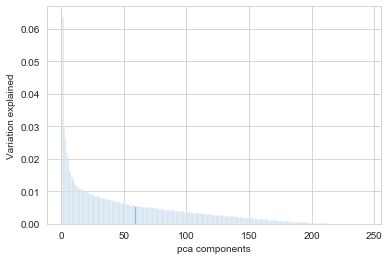

In [264]:
plt.bar(list(range(1,244)), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('pca components')
plt.show()

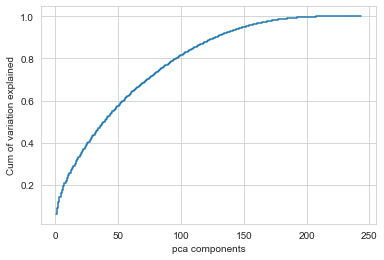

In [266]:
plt.step(list(range(1,244)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('pca components')
plt.show()

**Finding PC's that explain upto 95% of the varience**

In [267]:
pca_95 = PCA(n_components=0.95)
pca_95.fit(x)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [268]:
print("Eigen values:")
print("")
print(len(pca_95.explained_variance_))

Eigen values:

151


In [269]:
print("Eigen vectors/pca components:")
print("")
print(len(pca_95.components_))

Eigen vectors/pca components:

151


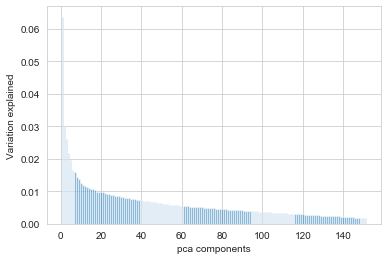

In [270]:
plt.bar(list(range(1,152)), pca_95.explained_variance_ratio_, alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('pca components')
plt.show()

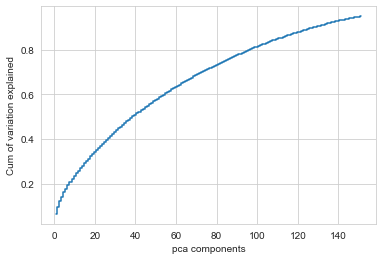

In [271]:
plt.step(list(range(1,152)),np.cumsum(pca_95.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('pca components')
plt.show()

In [272]:
pca_train = pca_95.transform(x)
pca_train.shape

(1439, 151)

In [273]:
pca_test = pca_95.transform(final_testing)
pca_test.shape

(1459, 151)

# Gradient Boost after PCA - Almost similar result
but we got the same result with only 151 dimensions. Improved the algorithm run time

In [274]:
estimator = [70,100,120,150,170]
depth = [2,3,4,5,7]
features = ["sqrt",30,70,80,100,120]


d={'estimator':[],'max_depth':[],'features':[],"avgscore":[]}

for est in estimator:
    for dep in depth:
        for feat in features:
            d['estimator'].append(est)
            d['max_depth'].append(dep)
            d['features'].append(feat)
            model = GradientBoostingRegressor(n_estimators=est, max_depth=dep, max_features=feat,random_state=7)
            model_scores = cross_val_score(model, pca_train, y, cv=10)
            d['avgscore'].append(model_scores.mean())    


models = pd.DataFrame(d)
models

estimator  max_depth features  avgscore
0           70          2     sqrt  0.645481
1           70          2       30  0.795128
2           70          2       70  0.841299
3           70          2       80  0.852784
4           70          2      100  0.852964
..         ...        ...      ...       ...
145        170          7       30  0.806420
146        170          7       70  0.853530
147        170          7       80  0.857177
148        170          7      100  0.858582
149        170          7      120  0.856858

[150 rows x 4 columns]

In [275]:
models.nlargest(10, ['avgscore']) 

estimator  max_depth features  avgscore
128        170          3       70  0.875091
98         150          3       70  0.874844
68         120          3       70  0.873421
130        170          3      100  0.873254
136        170          4      100  0.873070
106        150          4      100  0.872862
137        170          4      120  0.872403
107        150          4      120  0.872345
100        150          3      100  0.872140
76         120          4      100  0.871970

In [279]:
gb = GradientBoostingRegressor(n_estimators=170, max_depth=3, max_features=70,random_state=7) #0.15532
gb.fit(pca_train,y)
final_predictions = gb.predict(pca_test)

submit=pd.read_csv('test.csv')
submit["SalePrice"] = final_predictions
submit = submit[['Id','SalePrice']]
#submit.to_csv('submission_pca-gb.csv',index=False) 
submit

Id      SalePrice
0     1461  127538.119578
1     1462  156973.486570
2     1463  182046.119945
3     1464  200247.897198
4     1465  193433.553626
...    ...            ...
1454  2915   74859.207401
1455  2916   81769.653402
1456  2917  156386.894551
1457  2918  108411.250324
1458  2919  216285.822096

[1459 rows x 2 columns]

# Lasso after PCA - Again, almost similar result 
But only used 151 dimensions instead of 243

In [226]:
c_param=[0.1,1,10,100,200,300,500,700,1000,3000,5000,7000,10000]
for c in c_param: 
    lasso = Lasso(alpha=c,random_state=7)
    lassoscores = cross_val_score(lasso, pca_train, y, cv=10)
    lassopreds = cross_val_predict(lasso, pca_train, y, cv=10)
    rmse = np.sqrt(((np.log(y) -  np.log(lassopreds))**2).mean())
    
    print("c: "+str(c))
    print(lassoscores)
    print("avg performance: "+str(lassoscores.mean()))
    print("rmse: "+str(rmse))
    print("")
    print("----------------------------------------------------------------------")

c: 0.1
[-0.06814857  0.8541737   0.79170668  0.78351306  0.67306772  0.78045686
  0.7051259   0.81968156 -1.18005207  0.50916497]
avg performance: 0.46686898095524476
rmse: 0.19564942207970903

----------------------------------------------------------------------
c: 1
[-0.03498777  0.85533199  0.79234639  0.78349264  0.6857396   0.78057783
  0.71730581  0.81985002 -1.07299793  0.5516306 ]
avg performance: 0.4878289182010754
rmse: 0.19480443580693851

----------------------------------------------------------------------
c: 10
[ 0.21094811  0.86439379  0.7985047   0.78329531  0.76539423  0.78178376
  0.77705296  0.82148529 -0.32352011  0.7710508 ]
avg performance: 0.6250388834358291
rmse: 0.19036819543030015

----------------------------------------------------------------------
c: 100
[0.84091707 0.8909713  0.82917742 0.78125617 0.8664695  0.79264207
 0.83489172 0.83272515 0.48782713 0.87683916]
avg performance: 0.8033716683767194
rmse: 0.20875335002532722

---------------------------

In [229]:
lasso = Lasso(alpha=700,random_state=7) #0.17755
lasso.fit(pca_train, y)
final_predictions = lasso.predict(pca_test)

submit=pd.read_csv('test.csv')
submit["SalePrice"] = final_predictions
submit = submit[['Id','SalePrice']]
#submit.to_csv('submission_pca700.csv',index=False) 
submit

Id      SalePrice
0     1461  106813.919702
1     1462  178224.250190
2     1463  180813.908780
3     1464  197973.022695
4     1465  214836.221516
...    ...            ...
1454  2915   58592.125921
1455  2916   66462.532979
1456  2917  184938.228787
1457  2918  108740.501217
1458  2919  222638.137720

[1459 rows x 2 columns]